# 120 Years of Olympics History: Athlete, GDP, Result
## 1896 - 2016

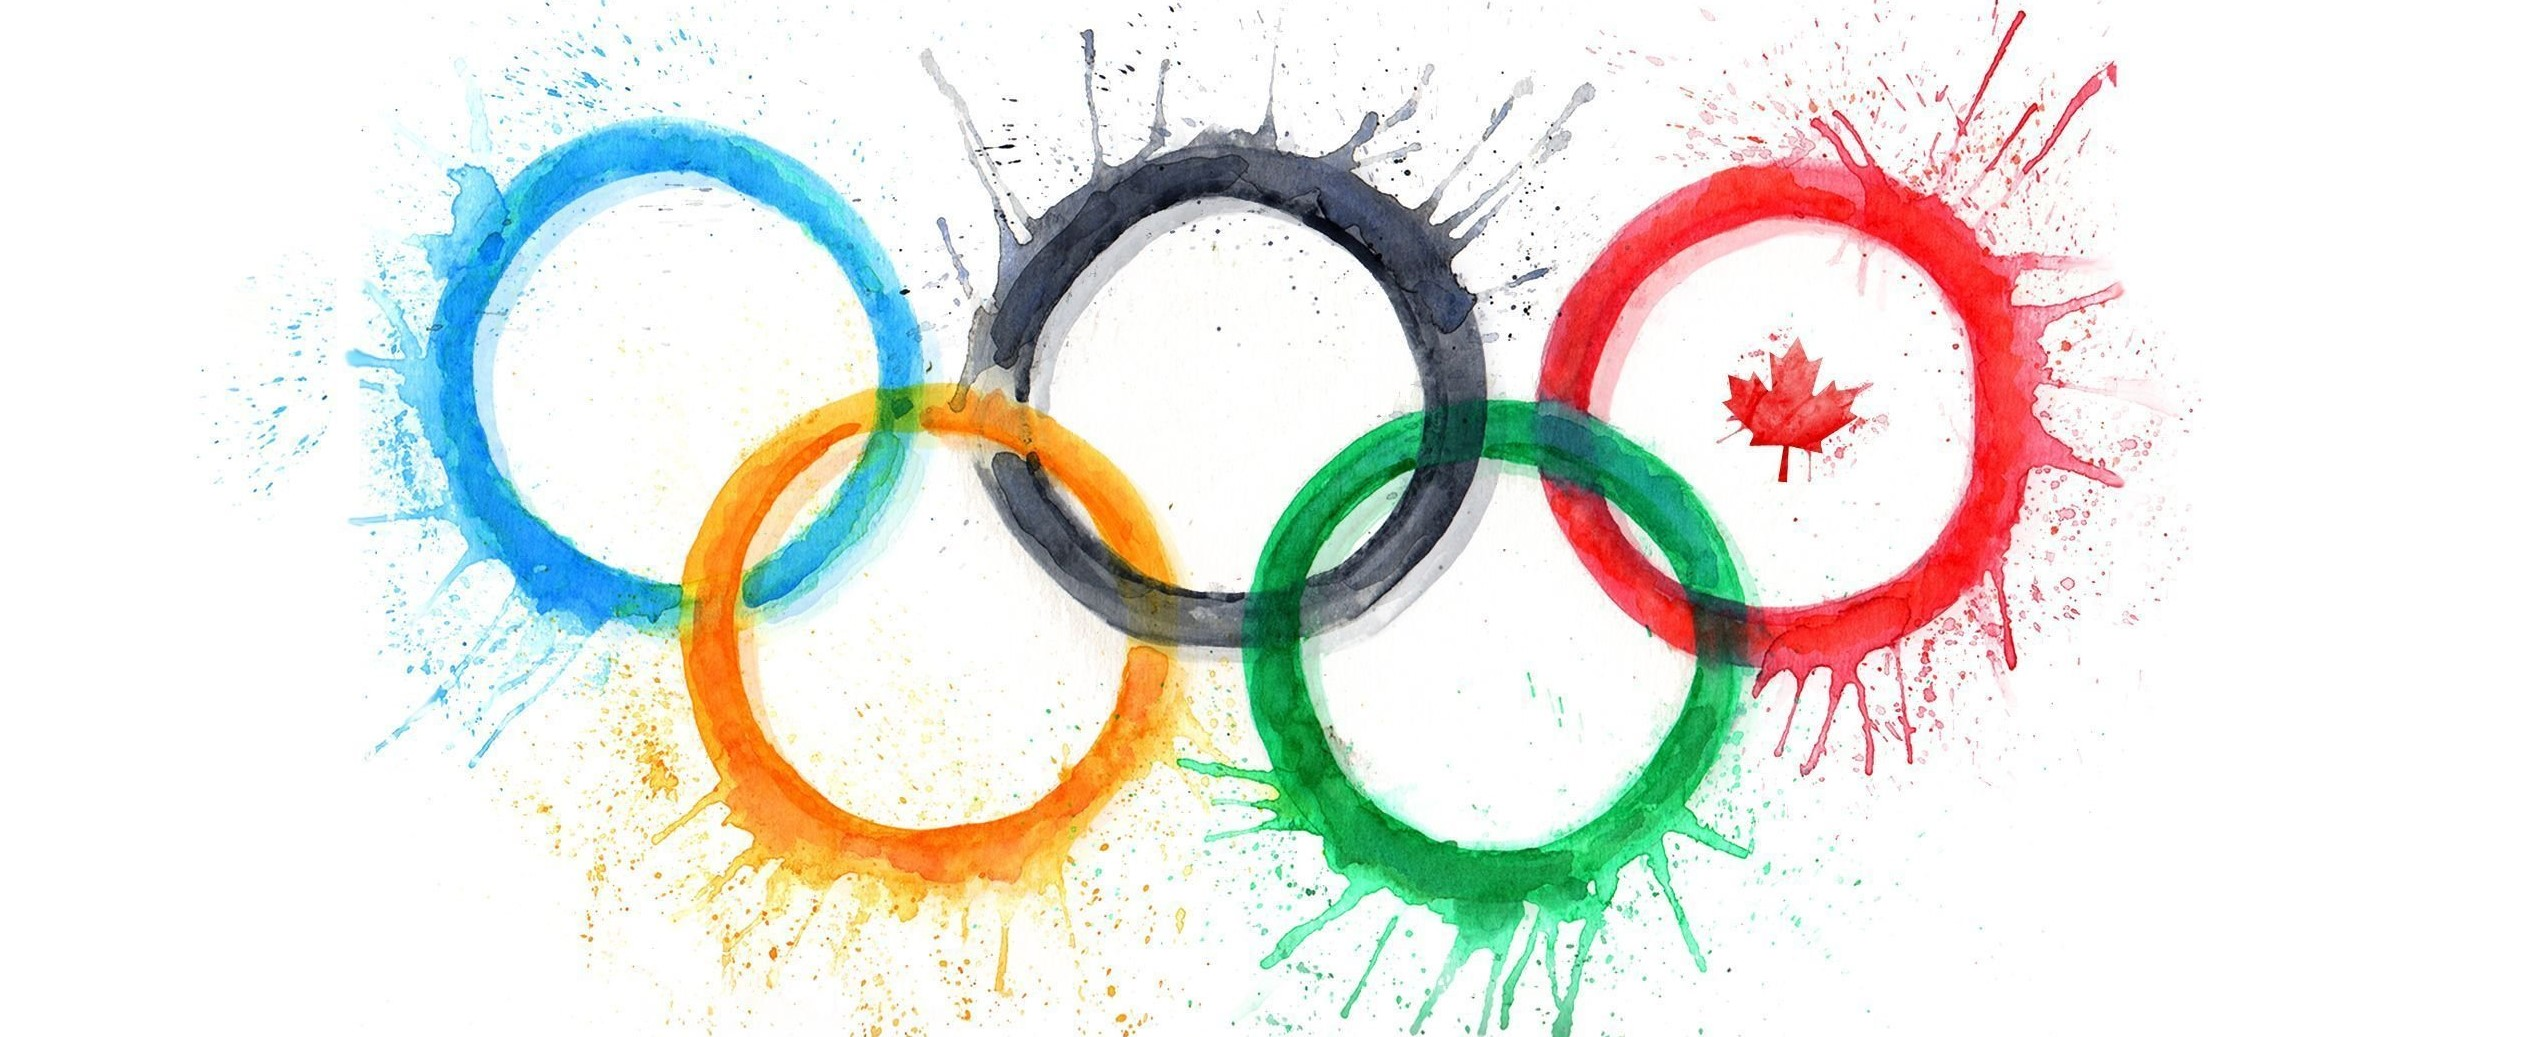

In [578]:
from IPython.display import Image
Image(filename = "ol_img.jpg", width=1000)

In [2]:
!pip install xgboost

  Using cached xgboost-1.5.2-py3-none-win_amd64.whl (106.6 MB)


In [1]:
# Import all required libraries

import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
#from xgboost.xgbclassifier import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Upload Athlete dataset
dfa = pd.read_csv('athlete_events.csv')
dfa

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


#### Content
- The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - Male(M) or Female(F)
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

In [3]:
dfa.shape # Shape of Athlete dataset(Rows, Columns)

(271116, 15)

In [4]:
# Upload Region Dataset

dfr = pd.read_csv('noc_regions.csv')
dfr.drop('notes', axis=1, inplace=True)
dfr.head(5)

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [5]:
# Merge Region into Athlete Dataset

df = dfa.merge(dfr, how='left',on='NOC')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [6]:
# Drop Unessential Columns
df.drop(['ID', 'Team', 'Games'], axis=1, inplace=True)
df

,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,Piotr ya,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,Piotr ya,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [7]:
df.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   NOC     271116 non-null  object 
 6   Year    271116 non-null  int64  
 7   Season  271116 non-null  object 
 8   City    271116 non-null  object 
 9   Sport   271116 non-null  object 
 10  Event   271116 non-null  object 
 11  Medal   39783 non-null   object 
 12  region  271116 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 29.0+ MB


In [9]:
# Save new dataset raw dataset
#df.to_csv('ath_data.csv')

In [10]:
print("Age of the Participants :\n\n", df.Age.sort_values(ascending=True).unique())


Age of the Participants :

 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.
 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63.
 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 80. 81. 84. 88.
 96. 97. nan]


In [11]:
print("Height of the Participants : \n\n", df.Height.sort_values(ascending=True).unique())

Height of the Participants : 

 [127. 128. 130. 131. 132. 133. 135. 136. 137. 138. 139. 140. 141. 142.
 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156.
 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170.
 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184.
 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198.
 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212.
 213. 214. 215. 216. 217. 218. 219. 220. 221. 223. 226.  nan]


In [12]:
print("Weigh of the Participants: \n\n", df.Weight.sort_values(ascending=True).unique())

Weigh of the Participants: 

 [ 25.          28.          30.          31.          32.
  33.          34.          35.          36.          37.
  38.          39.          40.          41.          42.
  43.          44.          45.          46.          47.
  48.          48.5         49.          49.5         50.
  51.          51.5         52.          52.5         53.
  53.5         54.          54.5         55.          55.5
  56.          56.5         57.          57.5         58.
  58.5         59.          59.5         60.          60.5
  61.          61.5         62.          62.5         63.
  63.5         64.          64.5         65.          65.5
  66.          66.5         67.          67.5         68.
  68.5         69.          69.5         70.          70.5
  71.          71.5         72.          72.5         73.
  73.5         74.          74.5         74.66666667  75.
  75.5         76.          76.5         77.          77.33333333
  77.5         78.          78

In [13]:
print("Olympics happend in these years :\n\n",df.Year.sort_values(ascending=True).unique())

Olympics happend in these years :

 [1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002
 2004 2006 2008 2010 2012 2014 2016]


In [14]:
# Count How many null values in each columns
df.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region         0
dtype: int64

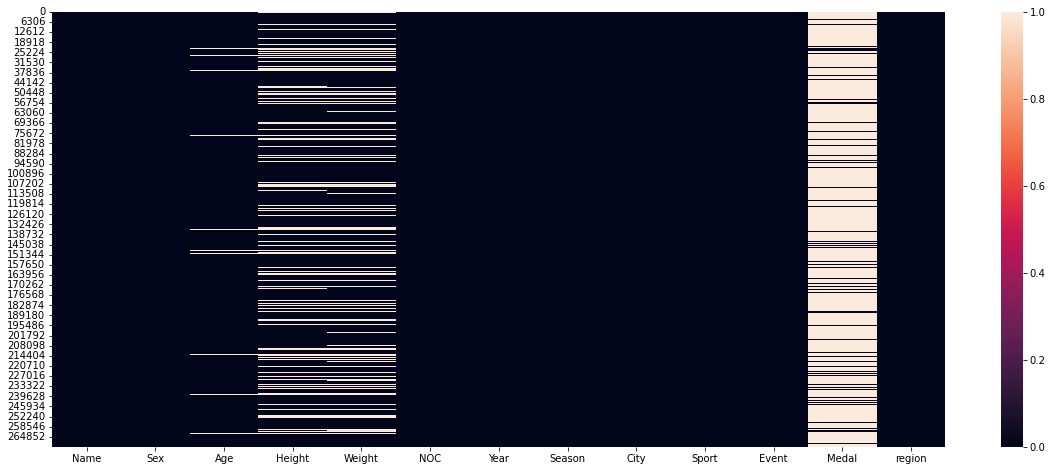

In [15]:
# Viewing missing value with help of heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull())
plt.show()

## Data Cleaning

### Cleanning Data

- Change name of some countries and others
- Age contains null values, Fill with mean/median.
- Height contains nulll values, Fill with mean/median.
- Weight contains null values, Fill with mean/median.
- Medal has null values, Fill with No Medal.

#### Naming Conversion

In [16]:
#df[df.region=='UK']
#df[df.region=='Trinidad']
df.region.replace({"UK":'United Kingdom', "Trinidad":'Trinidad and Tobago'},inplace=True)

In [17]:
df.rename(columns={'Sex':'Gender'},inplace=True)

In [18]:
df.rename(columns={'region':'Region'},inplace=True)

#### Drop Duplicates

In [19]:
# df.duplicated().sum()
# df.drop_duplicates(keep='last', inplace=True, ignore_index=True )
dfa.duplicated(subset=['Name', 'NOC', 'Season', 'City', 'Sport', 'Event', 'Medal']).sum()

1423

In [20]:
# Drop duplicates values on the basis of some columns.
df = df.drop_duplicates(subset=['Name', 'NOC', 'Season', 'City', 'Sport', 'Event', 'Medal'])

In [21]:
# We have a new shaped dataset
df.shape

(269693, 13)

In [22]:
df.isnull().sum()

Name           0
Gender         0
Age         9307
Height     58794
Weight     61507
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229928
Region         0
dtype: int64

#### Age

In [23]:
# df.Age.isnull().sum()

In [24]:
df['Age'].mean() #mean of Age column
df.Age.fillna(df['Age'].mean(), inplace=True) #fill with mean values and change parmanently  
df.Age.isnull().sum() # Check have there any many null values or not. 
df['Age'] = df['Age'].astype(int) # Change datatype into integer.

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_2268/1063820441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int) # Change datatype into integer.


#### Height

In [25]:
h = df.Height.mean()
h

175.33911493179198

In [26]:
m = df.Height.median()
m

175.0

In [27]:
df.Height.fillna(h, inplace=True)

In [28]:
df.Height.isnull().sum()

0

In [29]:
df['Height'] = df['Height'].astype(int)

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_2268/2033992823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = df['Height'].astype(int)


#### Weight

In [30]:
# df.Weight.isnull().sum()

In [31]:
w_md = df.Weight.median()
w_md

70.0

In [32]:
w_mn = df.Weight.mean()
w_mn

70.70152171615766

In [33]:
df.Weight.mean()
df.Weight.fillna(df.Weight.mean(), inplace=True)
df['Weight'] = df['Weight'].astype(int)
df.isnull().sum()

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_2268/2753073615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].astype(int)


Name           0
Gender         0
Age            0
Height         0
Weight         0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229928
Region         0
dtype: int64

In [34]:
display(df.dtypes)

Name      object
Gender    object
Age        int32
Height     int32
Weight     int32
NOC       object
Year       int64
Season    object
City      object
Sport     object
Event     object
Medal     object
Region    object
dtype: object

In [35]:
df.shape

(269693, 13)

In [36]:
# Save cleaned dataset(except medal) in our PC
# cl_df = df
# cl_df = cl_df.dropna()
# cl_df.isnull().sum()
# cl_df.to_csv("clnRowDt.csv")

In [37]:
# cl_df.shape

## Visualization

## 1. Gender wise distribution

### 1. Total Participants

In [38]:
# Find how many male and female participants were in olympics game
# Here, I have work on raw dataset
gender = df['Gender'].value_counts()
print('Total Male(M) and Female(F) paricipants :- ')
print(gender)

Total Male(M) and Female(F) paricipants :- 
M    195318
F     74375
Name: Gender, dtype: int64


<Figure size 1152x648 with 0 Axes>

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Participants \n (M = Male || F = Female) \n')

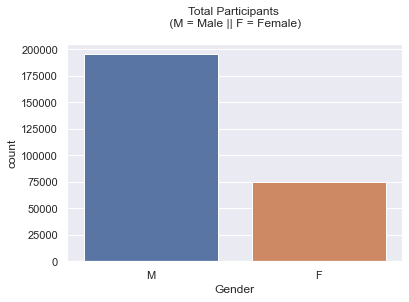

In [39]:
plt.figure(figsize = (16,9)) # figure size with ratio 16:9
sns.set(style='darkgrid',) # background darkgrid style of graph 
plt.show()
sns.countplot(df.Gender)
plt.title('Total Participants \n (M = Male || F = Female) \n')

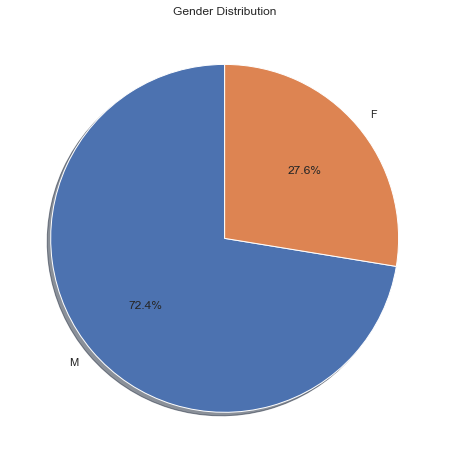

In [40]:
# Find how %age of both partcipants
plt.figure(figsize=(12,8))
plt.title('Gender Distribution')
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90, shadow=True);

### 2. Male and Female, Who won any medal

### Female

Bronze    3771
Gold      3747
Silver    3733
Name: Medal, dtype: int64


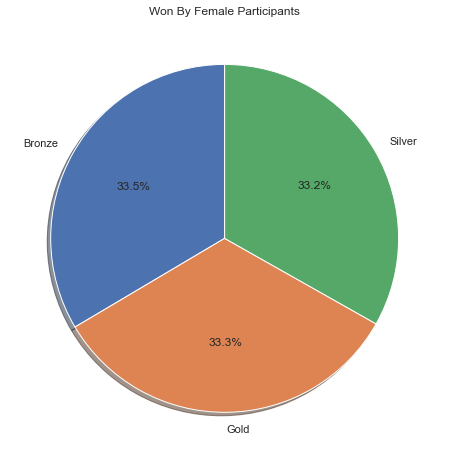

In [41]:
# We found how many Gold, Silver, Bronze Medals won by women?
female = df[df.Gender == 'F']
female=female.dropna()
f = female.Medal.value_counts()
print(f)
plt.figure(figsize=(12,8))
plt.title('Won By Female Participants')
plt.pie(f, labels=f.index, autopct='%1.1f%%', startangle=90, shadow=True);

### Male

Gold      9621
Bronze    9521
Silver    9372
Name: Medal, dtype: int64


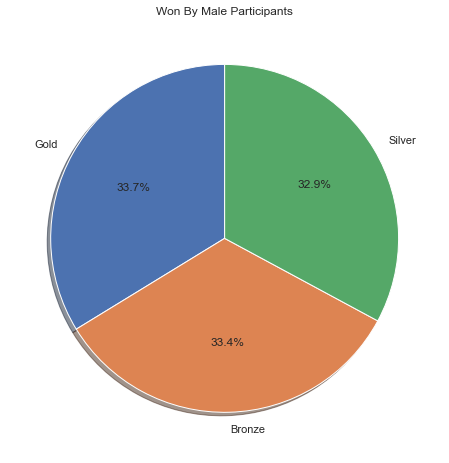

In [42]:
# We found how many Gold, Silver, Bronze Medals won by women?

male = df[df.Gender == 'M']
male=male.dropna()
m = male.Medal.value_counts()
print(m)
plt.figure(figsize=(12,8))
plt.title('Won By Male Participants')
plt.pie(m, labels=m.index, autopct='%1.1f%%', startangle=90, shadow=True);

## 2. Country wise distribution

### 1. Top 50 participants countries

In [43]:
#Top 50 countries participating
t50_countries = df.Region.value_counts().sort_values(ascending=False).head(50)
t50_countries
# df.shape

USA               18603
Germany           15787
France            12539
United Kingdom    12117
Russia            11692
Italy             10668
Canada             9681
Japan              8422
Sweden             8287
Australia          7723
Hungary            6552
Czech Republic     6405
Poland             6158
Switzerland        6083
Netherlands        5781
Finland            5467
Spain              5313
China              5138
Austria            5076
Norway             4954
South Korea        4462
Romania            4400
Brazil             3848
Belgium            3780
Denmark            3531
Bulgaria           3529
Argentina          3296
Serbia             3292
Greece             3189
Mexico             2865
Ukraine            2559
Cuba               2479
New Zealand        2342
Belarus            1787
South Africa       1699
Egypt              1620
Portugal           1522
Kazakhstan         1429
India              1406
Turkey             1355
Ireland            1323
Slovenia        

In [44]:
# 18603 times participant represented USA. One person play many format in his/her Sports in particular Year.

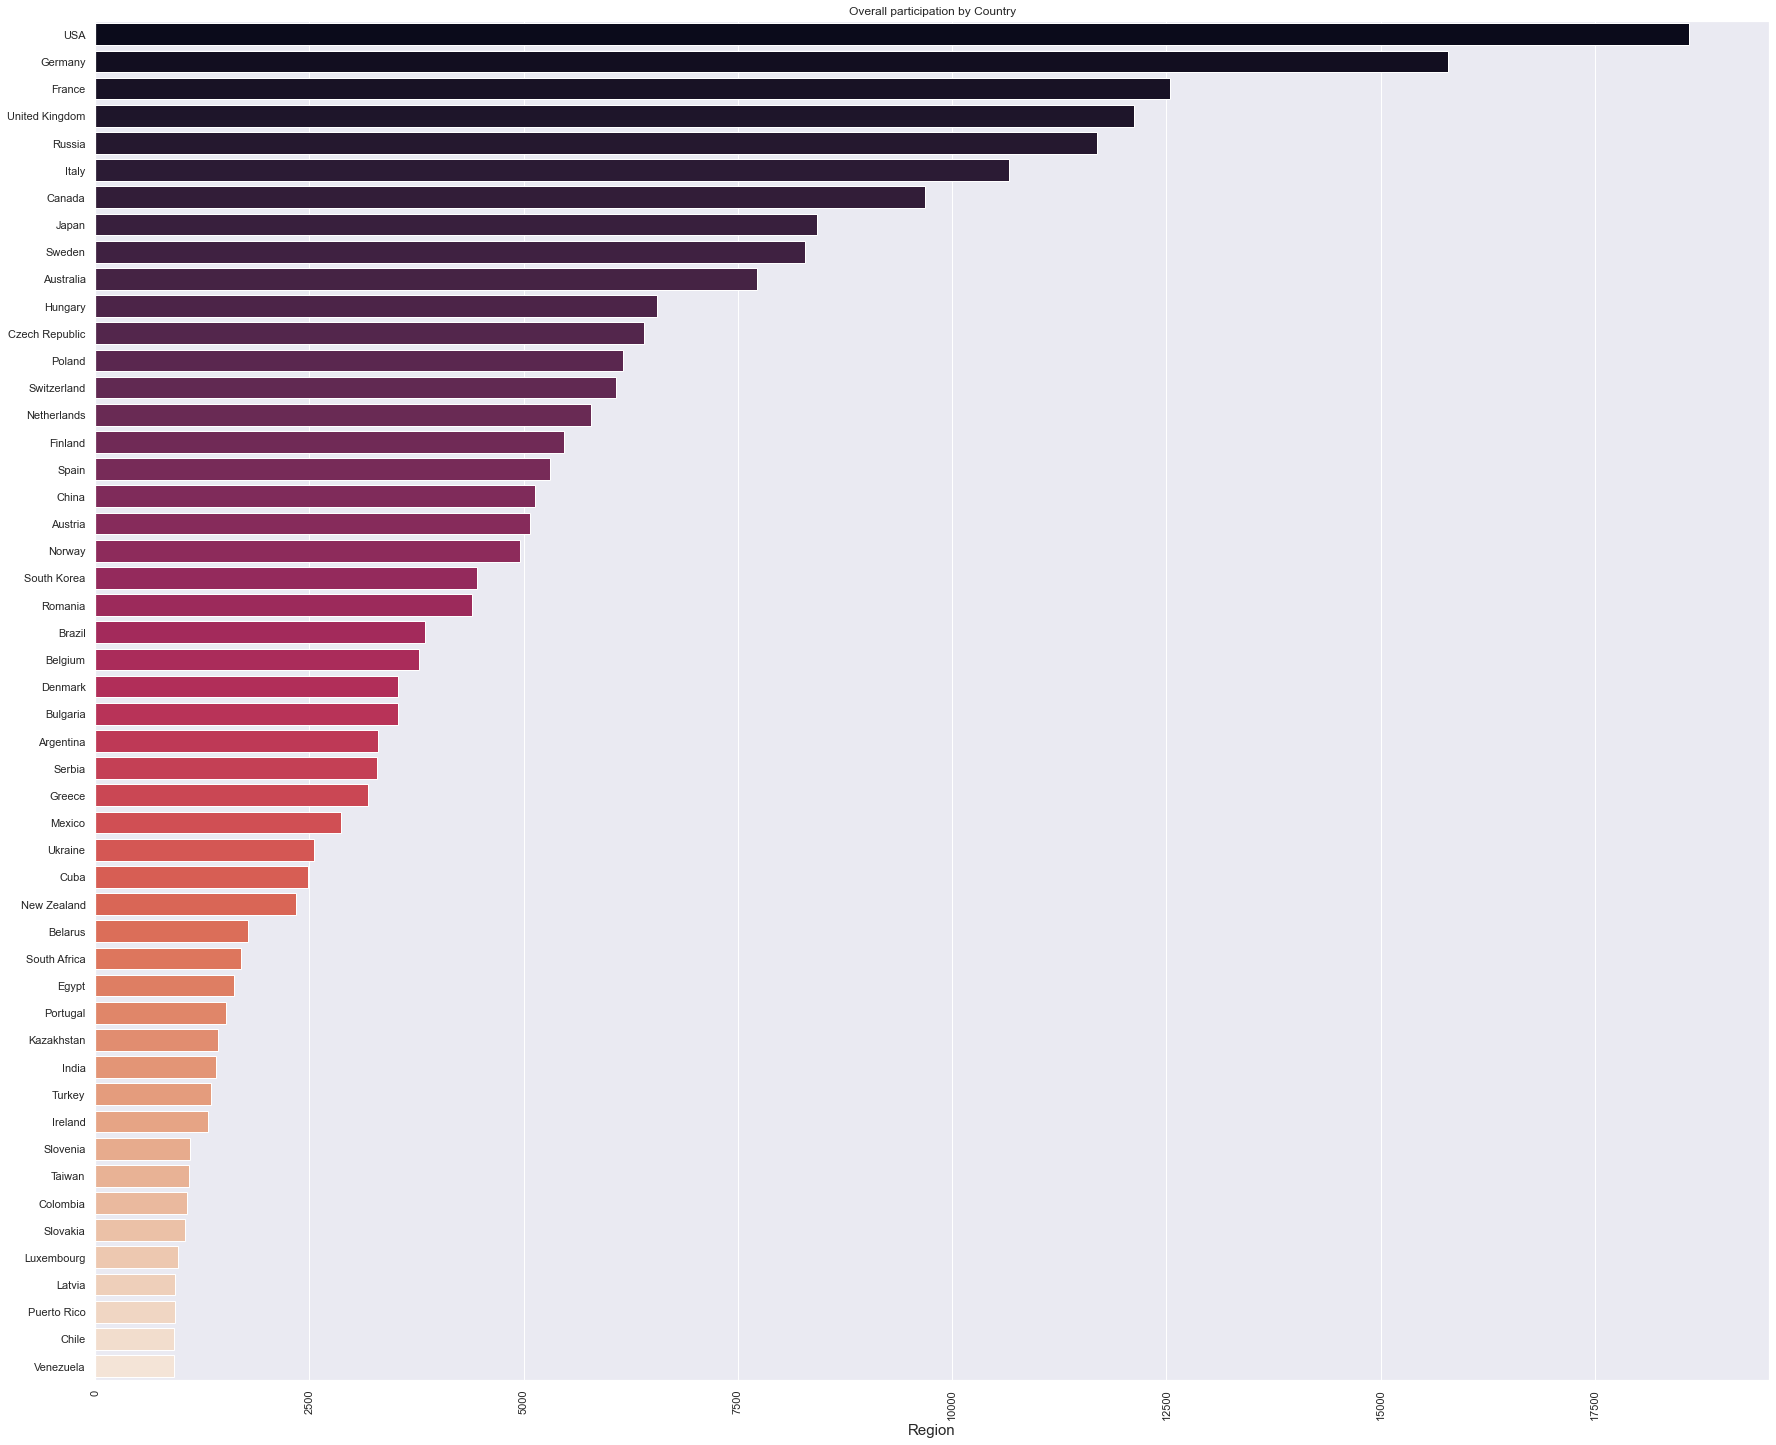

In [45]:
#plot for the top 50 countries

plt.figure(figsize=(30,25))
plt.xticks(rotation=90)
plt.title('Overall participation by Country')
plt.xlabel('Countries', fontsize=15)
sns.barplot(x=t50_countries, y=t50_countries.index, palette = 'rocket');

In [46]:
# Drop all null values and stored in a new varable called dff.

In [47]:
dff = df.dropna()
dff.reset_index(drop=True, inplace=True)

In [48]:
# dff.isnull().sum()
# dff.shape


In [49]:
d1 = dff[['Region', 'Medal']]
d1.head(3)

,Region,Medal
0,Denmark,Gold
1,Finland,Bronze
2,Finland,Bronze


In [50]:
x = d1[d1.Medal == 'Gold'].Region.value_counts().sort_values(ascending=False).head(50)
print("Top 50 countries won Gold Medal.\n",x.head())
y = d1[d1.Medal == 'Silver'].Region.value_counts().sort_values(ascending=False).head(50)
print("\nTop 50 countries won Silver Medal.\n",y.head())
z = d1[d1.Medal == 'Bronze'].Region.value_counts().sort_values(ascending=False).head(50)
print("\nTop 50 countries won Bronze Medal.\n",z.head())

Top 50 countries won Gold Medal.
 USA               2638
Russia            1599
Germany           1301
United Kingdom     677
Italy              575
Name: Region, dtype: int64

Top 50 countries won Silver Medal.
 USA               1640
Germany           1195
Russia            1170
United Kingdom     739
France             602
Name: Region, dtype: int64

Top 50 countries won Bronze Medal.
 USA               1358
Germany           1260
Russia            1178
France             666
United Kingdom     651
Name: Region, dtype: int64


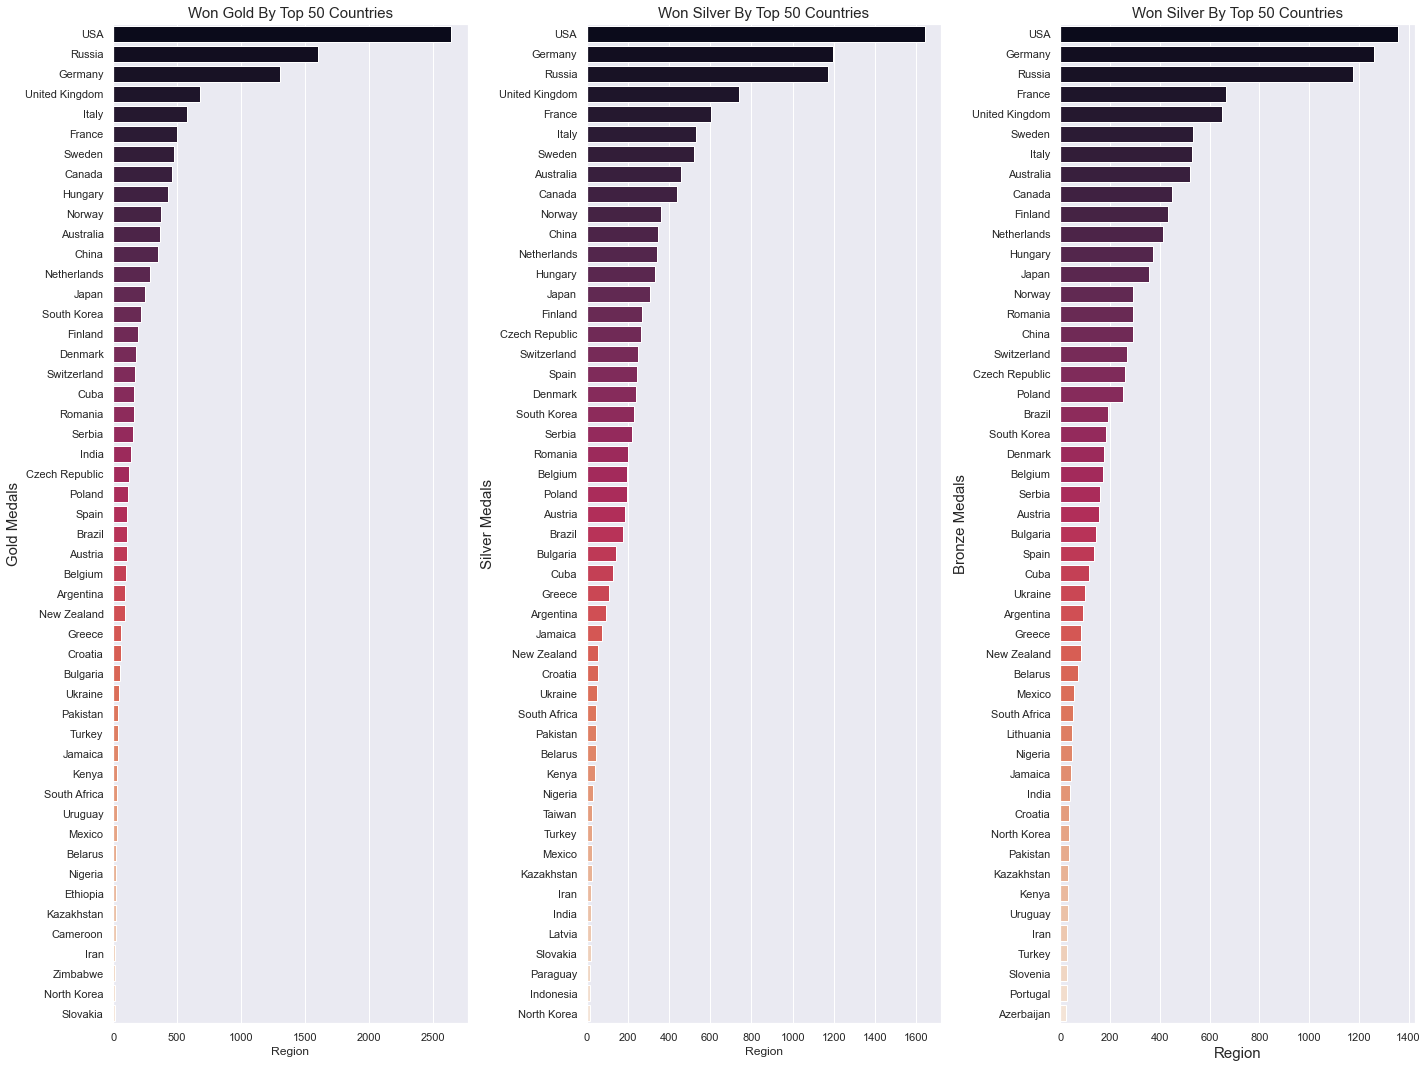

In [51]:
# Shown how many 
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)

plt.subplot(1,3,1)
plt.title('Won Gold By Top 50 Countries', fontsize=15)
#plt.xlabel('Countries', fontsize=15)
plt.ylabel('Gold Medals', fontsize=15)
sns.barplot(x=x, y=x.index, palette = 'rocket');
#sns.lineplot(x=x, y=x.index, palette = 'crest');

plt.subplot(1,3,2)
plt.title('Won Silver By Top 50 Countries', fontsize=15)
#plt.xlabel('Countries', fontsize=15)
plt.ylabel('Silver Medals', fontsize=15)
sns.barplot(x=y, y=y.index, palette = 'rocket');
#sns.lineplot(x=y, y=y.index, color='b', palette = 'crest');

plt.subplot(1,3,3)
plt.title('Won Silver By Top 50 Countries', fontsize=15)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Bronze Medals', fontsize=15)
sns.barplot(x=z, y=z.index, palette = 'rocket');
#sns.lineplot(x=z, y=z.index, color='b', palette = 'crest');

plt.tight_layout()

## 3. Year Wise Medal Distribution

In [52]:
dff.head()

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
0,Edgar Lindenau Aabye,M,34,175,70,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,Arvo Ossian Aaltonen,M,30,175,70,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
2,Arvo Ossian Aaltonen,M,30,175,70,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
3,Juhamatti Tapio Aaltonen,M,28,184,85,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,Paavo Johannes Aaltonen,M,28,175,64,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


In [53]:
yr = dff[['Year', 'Medal']]
yr.Medal.value_counts()

Gold      13368
Bronze    13292
Silver    13105
Name: Medal, dtype: int64

In [54]:
yr.Year.value_counts()

2008    2048
1992    2030
2016    2023
2000    2004
2004    2001
2012    1941
1988    1845
1996    1842
1984    1698
1980    1602
1976    1531
1972    1414
1920    1308
1968    1254
1964    1215
1960    1058
1956    1043
1952    1033
1936    1025
1948     985
1924     962
1912     941
1908     831
1928     823
1932     739
2014     597
1900     593
2006     526
2010     520
1904     486
2002     477
1906     457
1998     439
1994     331
1896     143
Name: Year, dtype: int64

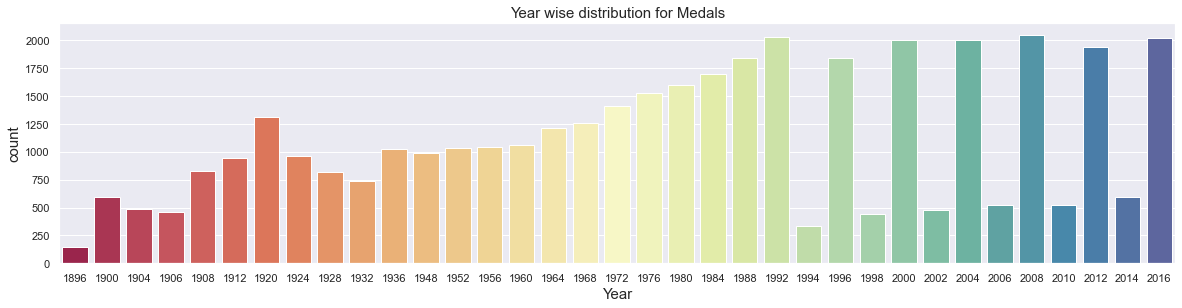

In [55]:
# Medals won by each year
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)

plt.subplot(3,1,1)
plt.title('Year wise distribution for Medals', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('No. of Medals', fontsize=15)
sns.countplot(x=yr.Year, palette = 'Spectral');
# sns.lineplot(x=g.index, y=g, palette = 'rocket');

In [56]:
g = yr[yr.Medal == 'Gold'].Year.value_counts().sort_index(ascending=True).head(50)
print('Won Bronze Medal in each year: \n', g.head())
s = yr[yr.Medal == 'Silver'].Year.value_counts().sort_index(ascending=True).head(50)
print('\nWon Bronze Medal in each year: \n', s.head())
b = yr[yr.Medal == 'Bronze'].Year.value_counts().sort_index(ascending=True).head(50)
print('\nWon Bronze Medal in each year: \n',b.head(5))

Won Bronze Medal in each year: 
 1896     62
1900    198
1904    173
1906    156
1908    294
Name: Year, dtype: int64

Won Bronze Medal in each year: 
 1896     43
1900    220
1904    163
1906    156
1908    281
Name: Year, dtype: int64

Won Bronze Medal in each year: 
 1896     38
1900    175
1904    150
1906    145
1908    256
Name: Year, dtype: int64


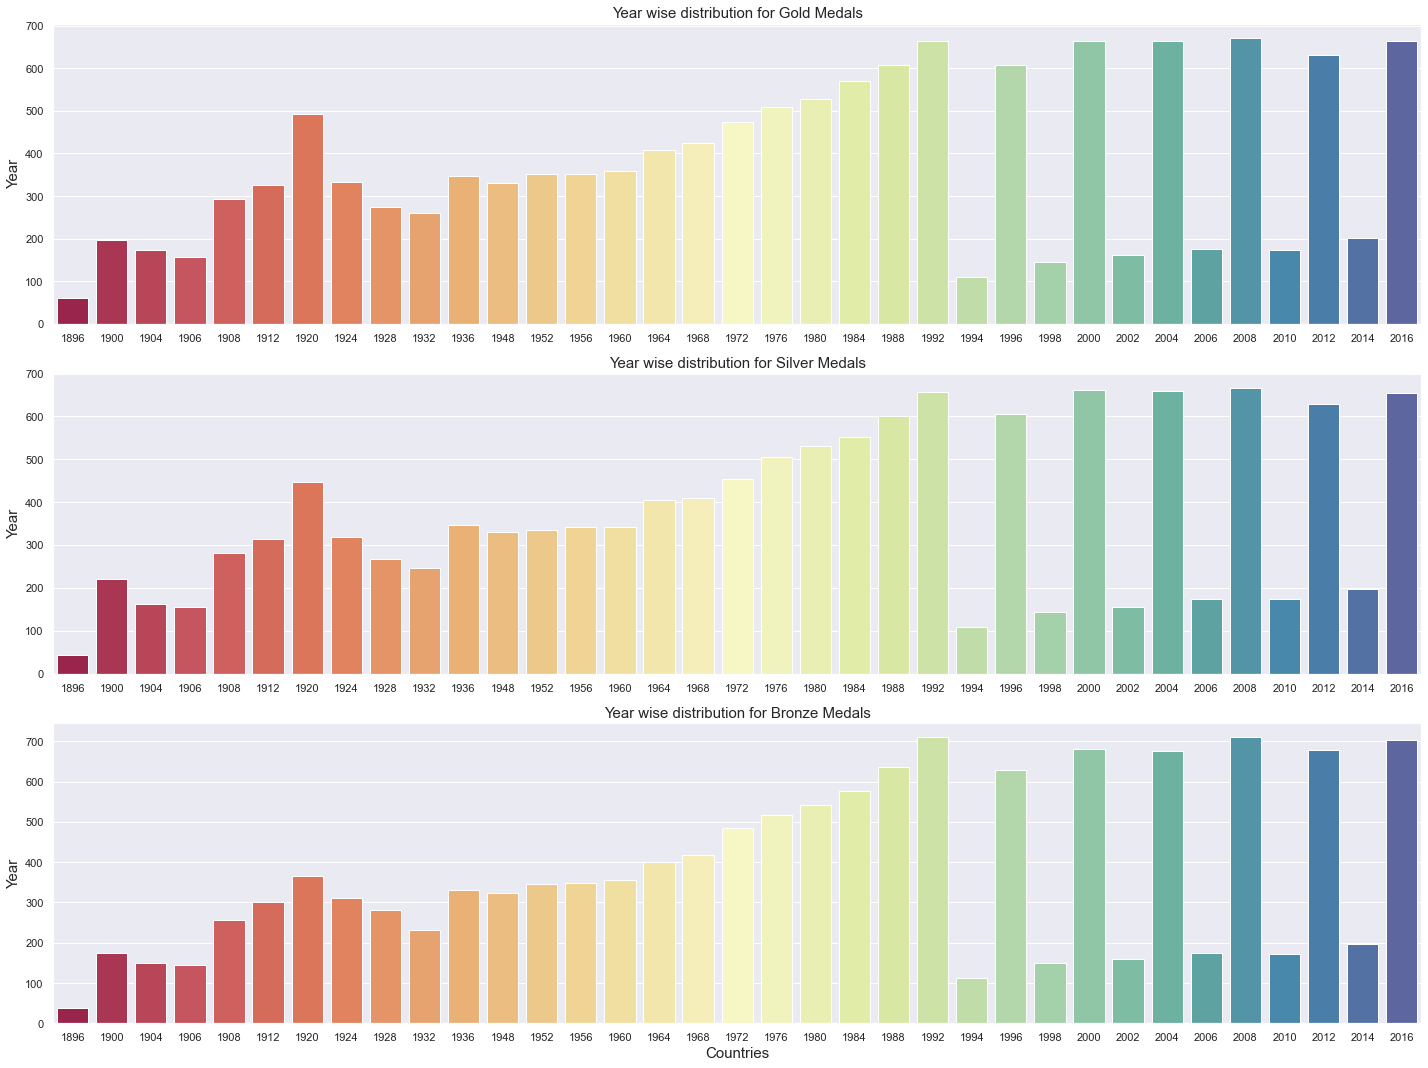

In [57]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)

plt.subplot(3,1,1)
plt.title('Year wise distribution for Gold Medals', fontsize=15)
#plt.xlabel('Countries', fontsize=15)
plt.ylabel('Gold Medals', fontsize=15)
sns.barplot(x=g.index, y=g, palette = 'Spectral');
# sns.lineplot(x=g.index, y=g, palette = 'rocket');

plt.subplot(3,1,2)
plt.title('Year wise distribution for Silver Medals', fontsize=15)
#plt.xlabel('Countries', fontsize=15)
plt.ylabel('Silver Medals', fontsize=15)
sns.barplot(x=s.index, y=s, palette = 'Spectral');

plt.subplot(3,1,3)
plt.title('Year wise distribution for Bronze Medals', fontsize=15)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Bronze Medals', fontsize=15)
sns.barplot(x=b.index, y=b, palette = 'Spectral');

plt.tight_layout()

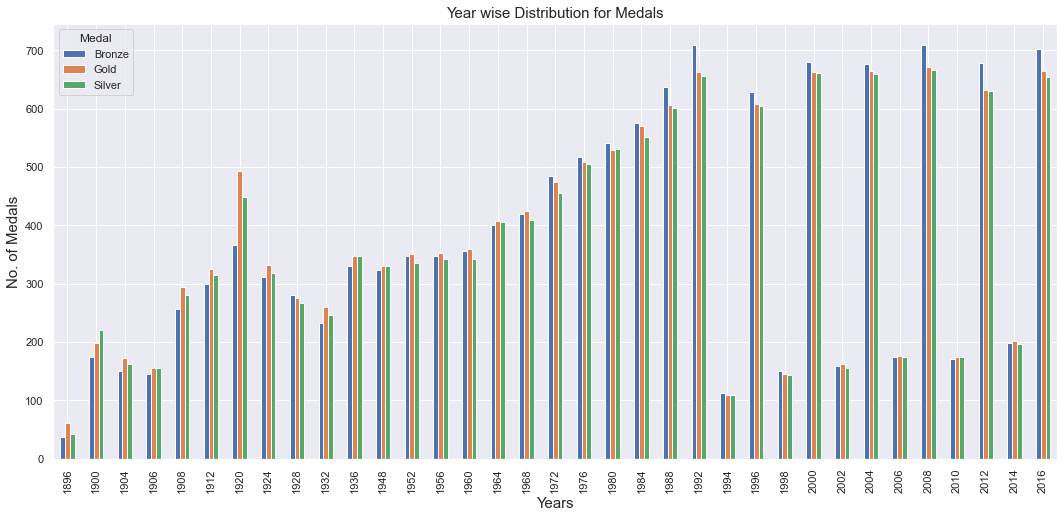

In [58]:
# Compare all three medals in each year

%matplotlib inline
# plt.figure(figsize=(20,30))
# plt.xticks(rotation=90)

pd.crosstab(yr.Year, yr.Medal).plot(kind='bar', figsize=(18,8))
plt.title('Year wise Distribution for Medals',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('No. of Medals',fontsize=15)
plt.show()
# plt.savefig('purchase_fre_job')

## 4. Season Wise Distribution

Text(0.5, 1.0, 'Participants In Winter Season')

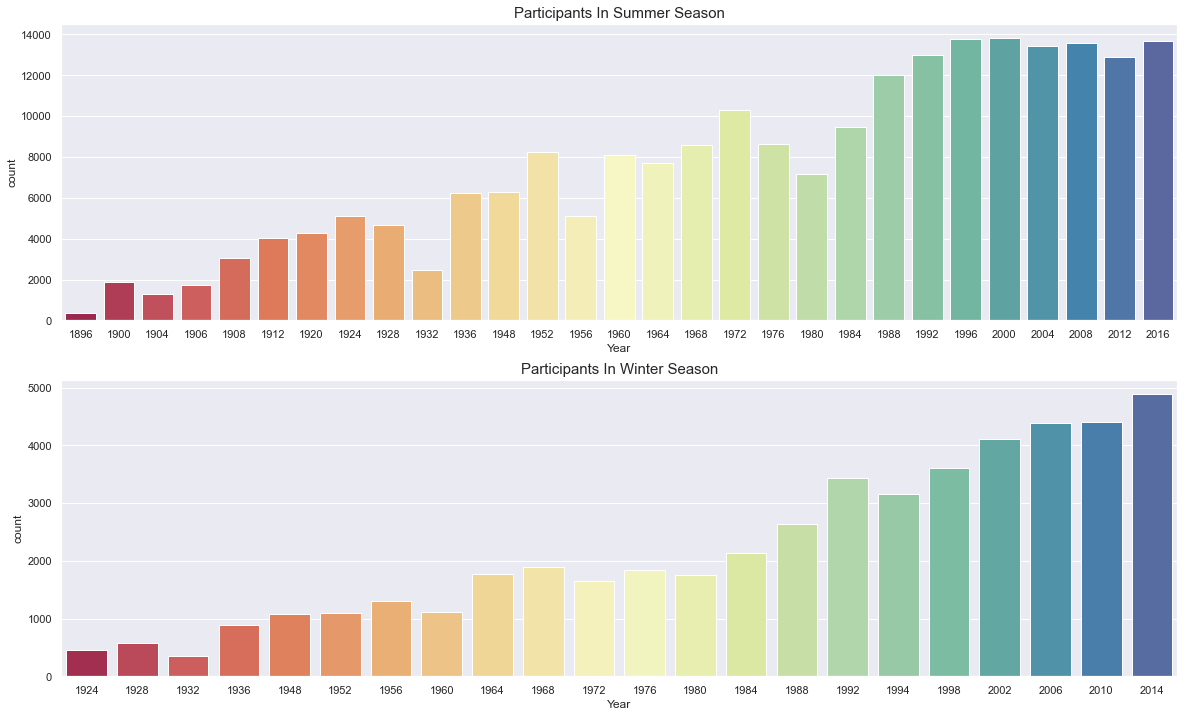

In [59]:
# Participants in Winter and Summer Season
Sum = df[df.Season=='Summer']
Win = df[df.Season=='Winter']

sns.set(style="darkgrid")
plt.figure(figsize =(20,12))

plt.subplot(2,1,1)
sns.countplot(x= 'Year', data=Sum, palette= "Spectral")
plt.title('Participants In Summer Season', fontsize=15)

plt.subplot(2,1,2)
sns.countplot(x= 'Year', data=Win, palette= "Spectral")
plt.title('Participants In Winter Season', fontsize=15)

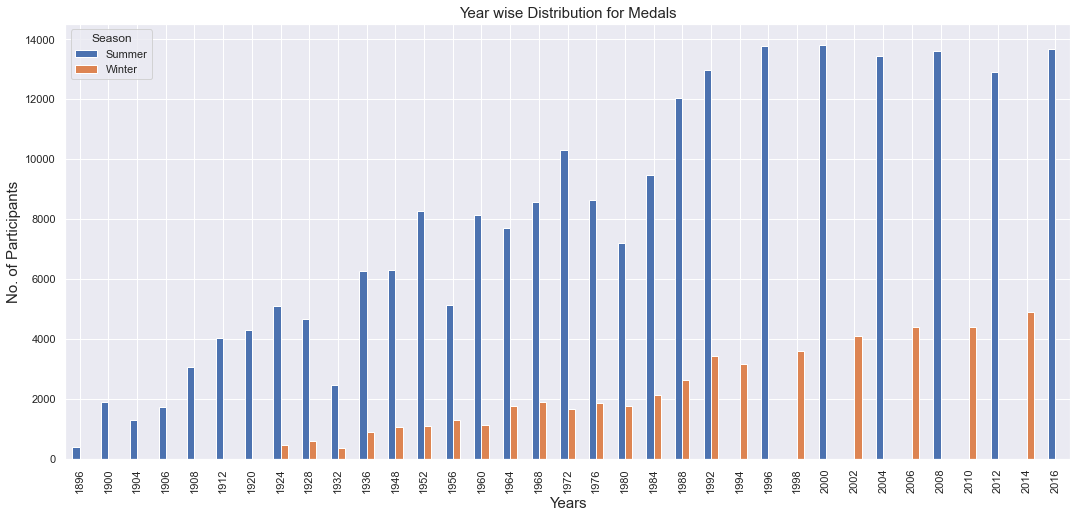

In [60]:
# Compare all three medals in each year

# %matplotlib inline
# plt.figure(figsize=(20,30))
# plt.xticks(rotation=90)

pd.crosstab(df.Year, df.Season).plot(kind='bar', figsize=(18,8))
plt.title('Year wise Distribution for Medals',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('No. of Participants',fontsize=15)
plt.show()
# plt.savefig('purchase_fre_job')

Text(0.5, 1.0, 'Winners of Medals In Winter Season')

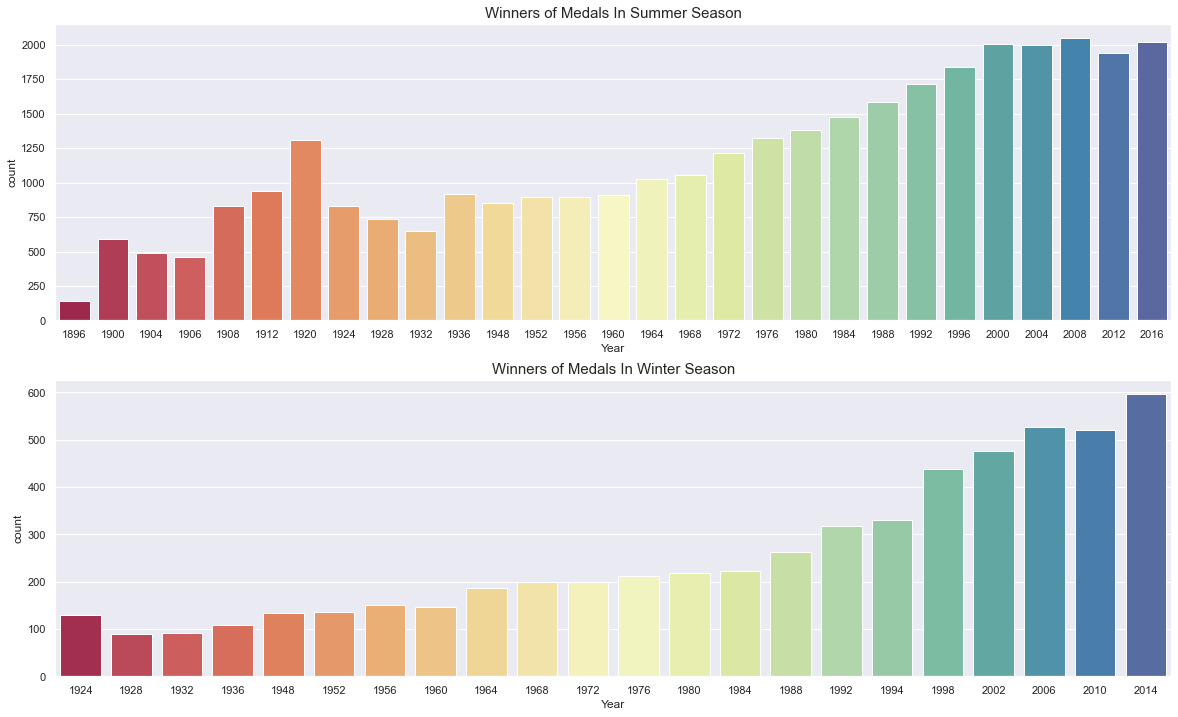

In [61]:
# Medal in Winter and Summer Season
Sum = dff[dff.Season=='Summer']
Win = dff[dff.Season=='Winter']

sns.set(style="darkgrid")
plt.figure(figsize =(20,12))

plt.subplot(2,1,1)
sns.countplot(x= 'Year', data=Sum, palette= "Spectral")
plt.title('Winners of Medals In Summer Season', fontsize=15)

plt.subplot(2,1,2)
sns.countplot(x= 'Year', data=Win, palette= "Spectral")
plt.title('Winners of Medals In Winter Season', fontsize=15)

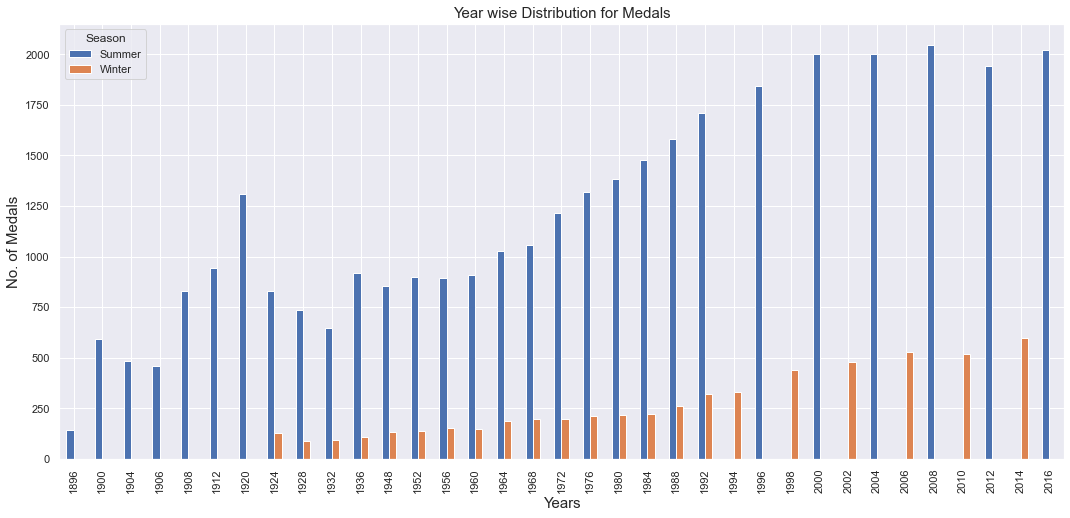

In [62]:
# Medals in Winter and Summer season

pd.crosstab(dff.Year, dff.Season).plot(kind='bar', figsize=(18,8))
plt.title('Year wise Distribution for Medals',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('No. of Medals',fontsize=15)
plt.show()

In [63]:
womenOlympicsSum = dff[(dff.Gender=='F') & (dff.Season=='Summer')]
womenOlympicsWin = dff[(dff.Gender=='F') & (dff.Season=='Winter')]
# womenOlympicsSum.head()

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Text(0.5, 1.0, 'Women Medallist In Winter Season')

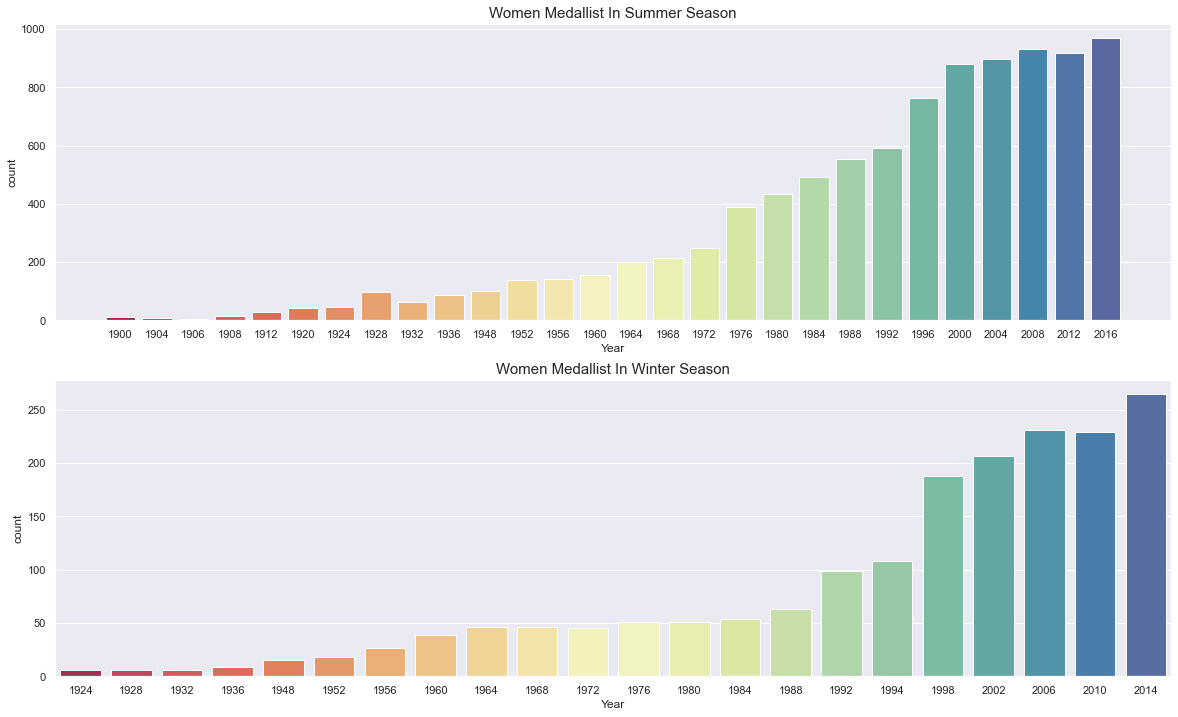

In [64]:
sns.set(style="darkgrid")
plt.figure(figsize =(20,12))

plt.subplot(2,1,1)
sns.countplot(x= 'Year', data=womenOlympicsSum, palette= "Spectral")
sns.lineplot(x='Year', data=womenOlympicsSum, palette='crest')
plt.title('Women Medallist In Summer Season', fontsize=15)

plt.subplot(2,1,2)
sns.countplot(x= 'Year', data=womenOlympicsWin, palette= "Spectral")
plt.title('Women Medallist In Winter Season', fontsize=15)

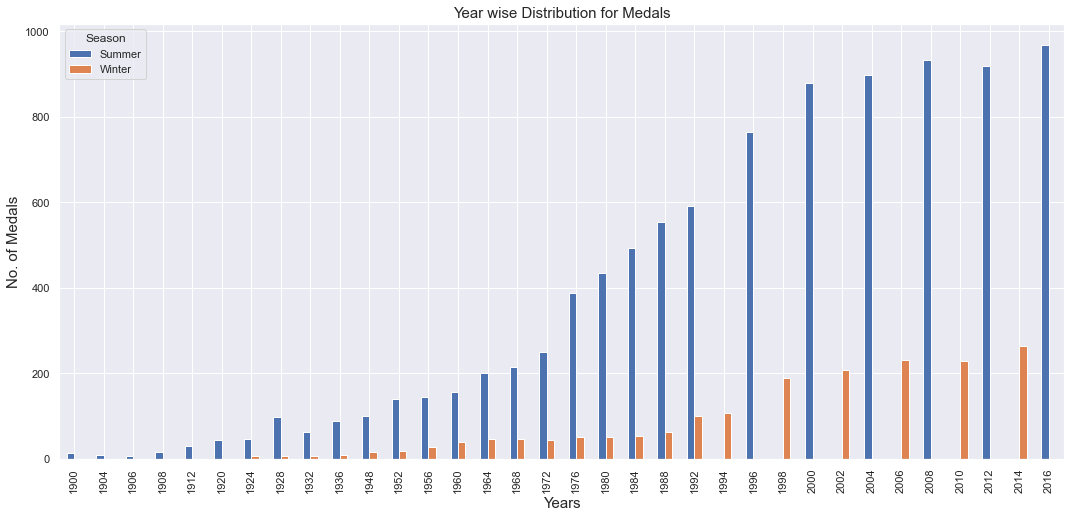

In [65]:
women = dff[dff.Gender=='F']
pd.crosstab(women.Year, women.Season).plot(kind='bar', figsize=(18,8))
plt.title('Year wise Distribution for Medals',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('No. of Medals',fontsize=15)
plt.show()

#### Variation of Male/Female athletes over Time (Summer Games)

In [66]:
MenOverTimeSum = dff[(dff.Gender == 'M') & (dff.Season == 'Summer')]
WomenOverTimeSum = dff[(dff.Gender == 'F') & (dff.Season == 'Summer')]
MenOverTimeWin = dff[(dff.Gender == 'M') & (dff.Season == 'Winter')]
WomenOverTimeWin = dff[(dff.Gender == 'F') & (dff.Season == 'Winter')]
womenOlympicsSum.head()

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
17,Ragnhild Margrethe Aamodt,F,27,163,70,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway
19,Willemien Aardenburg,F,22,175,70,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,Netherlands
21,Ann Kristin Aarnes,F,23,182,64,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway
29,Patimat Abakarova,F,21,165,49,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan
30,Mariya Vasilyevna Abakumova (-Tarabina),F,22,179,80,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia


Text(0.5, 1.0, 'Variation of Male and Female Medallist over time for Summer Olympics')

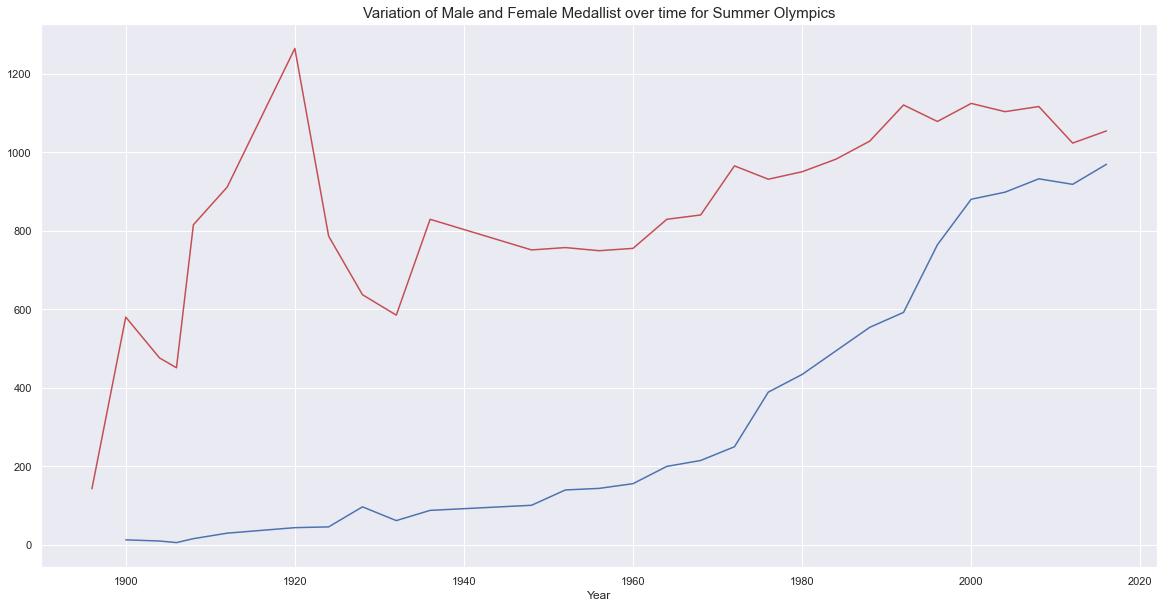

In [67]:
part1 = MenOverTimeSum.groupby('Year')['Gender'].value_counts()
part2 = WomenOverTimeSum.groupby('Year')['Gender'].value_counts()
plt.figure(figsize=(20, 10))
part1.loc[:,'M'].plot(color='r')
part2.loc[:,'F'].plot(color='b')
plt.title('Variation of Male and Female Medallist over time for Summer Olympics', fontsize=15)

Text(0.5, 1.0, 'Variation of Male and Female Medallist over time for Winter Olympics')

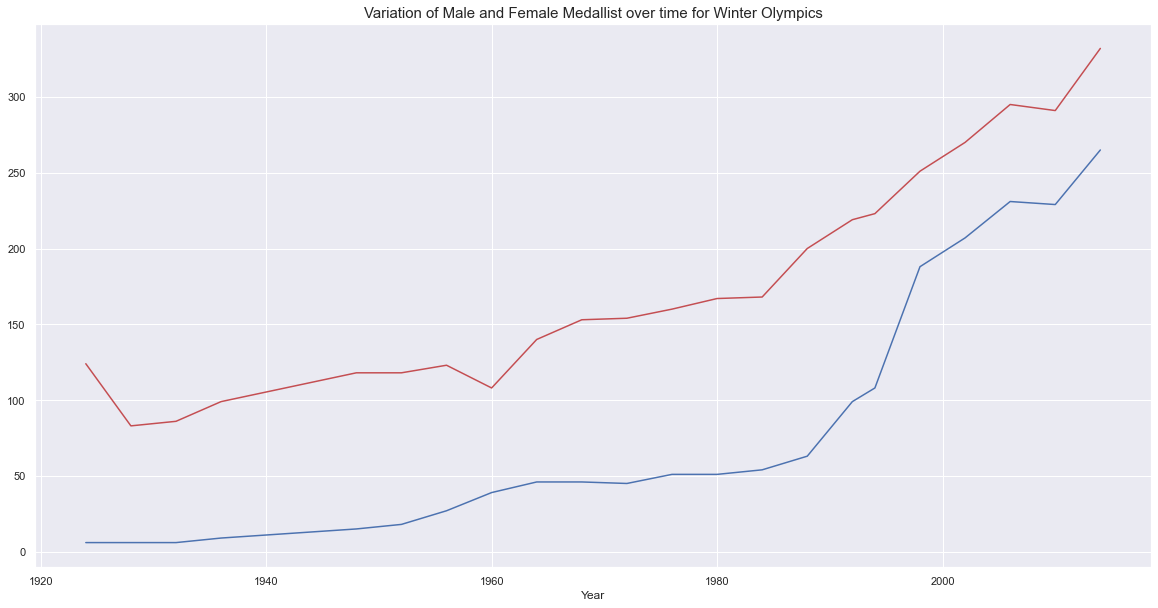

In [68]:
part1 = MenOverTimeWin.groupby('Year')['Gender'].value_counts()
part2 = WomenOverTimeWin.groupby('Year')['Gender'].value_counts()
plt.figure(figsize=(20, 10))
part1.loc[:,'M'].plot(color='r')
part2.loc[:,'F'].plot(color='b')
plt.title('Variation of Male and Female Medallist over time for Winter Olympics', fontsize=15)

In [69]:
# part2 = WomenOverTimeSum.groupby('Year')['Gender'].value_counts()
# plt.figure(figsize=(20, 10))
# part2.loc[:,'F'].plot(color='b')
# plt.title('Variation of Female Athletes over time', fontsize=15)

#### Variation of Male/Female athletes over Time (Winter Games)

In [70]:
MenOverTimeWin = dff[(dff.Gender == 'M') & (dff.Season == 'Winter')]
WomenOverTimeWin = dff[(dff.Gender == 'F') & (dff.Season == 'Winter')]

In [71]:
# part1 = MenOverTimeWin.groupby('Year')['Gender'].value_counts()
# plt.figure(figsize=(20, 10))
# part1.loc[:,'M'].plot(color='r')
# plt.title('Variation of Male Athletes over time', fontsize=15)

In [72]:
# part2 = WomenOverTimeWin.groupby('Year')['Gender'].value_counts()
# plt.figure(figsize=(20, 10))
# part2.loc[:,'F'].plot(color='b')
# plt.title('Variation of Female Athletes over time', fontsize=15)

## 5 Age & Height Wise Distribution

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

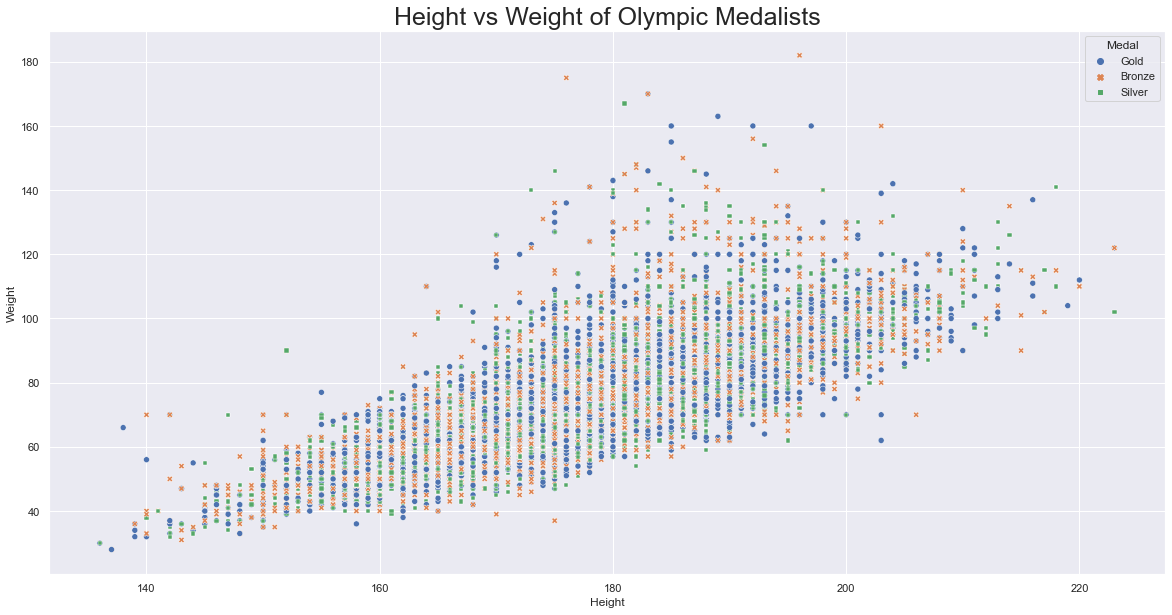

In [73]:
# Medallist on the basis of Height and Weight
plt.figure(figsize=(20, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=dff, hue="Medal", style="Medal")
plt.title('Height vs Weight of Olympic Medalists', fontsize=25)

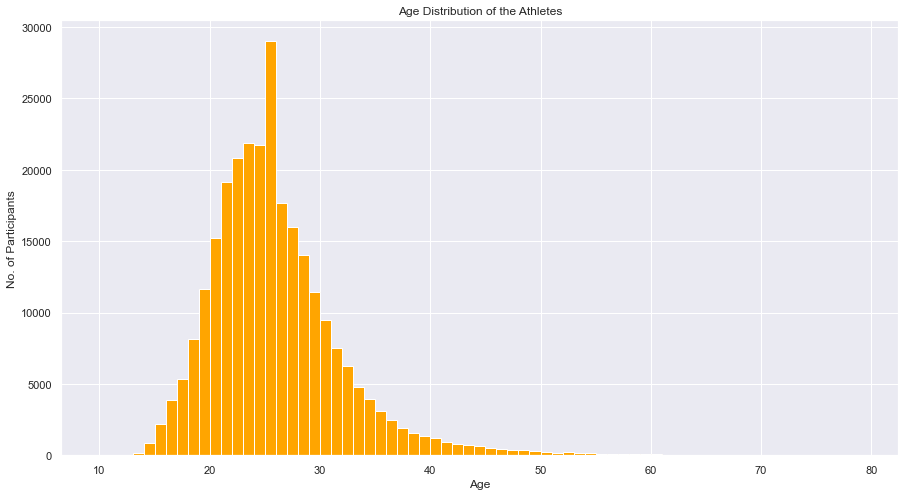

In [74]:
# Age distribution of the Athletes
plt.figure(figsize=(15,8))
plt.title("Age Distribution of the Athletes")
plt.xlabel("Age")
plt.ylabel("No. of Participants")
plt.hist(df.Age, bins = np.arange(10,80,1), color='orange', edgecolor = "white")
plt.show()

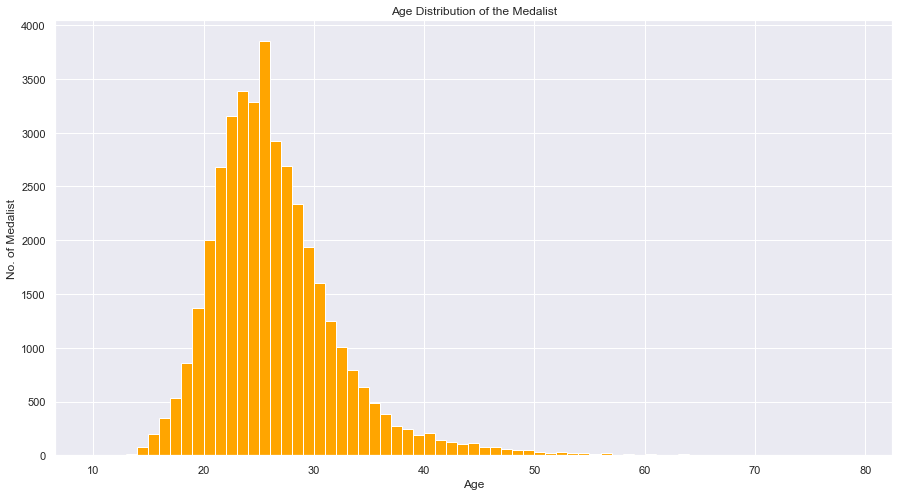

In [75]:
# Age distribution of the Medalist
plt.figure(figsize=(15,8))
plt.title("Age Distribution of the Medalist")
plt.xlabel("Age")
plt.ylabel("No. of Medalist")
plt.hist(dff.Age, bins = np.arange(10,80,1), color='orange', edgecolor = "white")
plt.show()

In [76]:
age_ab_60 = dff[dff.Age>=60]
age_ab_60

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
2904,Rudolf Georg Binding,M,60,175,70,GER,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Literature, Lyric Works",Silver,Germany
4553,John Hurst Butt,M,61,175,70,GBR,1912,Summer,Stockholm,Shooting,"Shooting Men's Trap, Team",Silver,United Kingdom
6070,John (Herbert Crawford-) Copley (Williamson-),M,73,175,70,GBR,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver,United Kingdom
8276,Jozu Dupon,M,72,175,70,BEL,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Medals",Bronze,Belgium
8337,Samuel Harding Duvall,M,68,175,70,USA,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Silver,USA
8819,Thodore Lon Epin,M,61,175,70,FRA,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 28 metres, Team",Bronze,France
8820,Thodore Lon Epin,M,61,175,70,FRA,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 33 metres, Team",Silver,France
8821,Thodore Lon Epin,M,61,175,70,FRA,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 50 metres, Team",Silver,France
12608,Letitia Marion Hamilton,F,69,175,70,IRL,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",Bronze,Ireland
14884,Isaac Lazarus Israls,M,63,175,70,NED,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold,Netherlands


In [77]:
age_ab_60[age_ab_60.Age>=60].Age.count()

42

In [78]:
age_ab_60[['Name','Age','Medal','Sport','Region']]

,Name,Age,Medal,Sport,Region
2904,Rudolf Georg Binding,60,Silver,Art Competitions,Germany
4553,John Hurst Butt,61,Silver,Shooting,United Kingdom
6070,John (Herbert Crawford-) Copley (Williamson-),73,Silver,Art Competitions,United Kingdom
8276,Jozu Dupon,72,Bronze,Art Competitions,Belgium
8337,Samuel Harding Duvall,68,Silver,Archery,USA
8819,Thodore Lon Epin,61,Bronze,Archery,France
8820,Thodore Lon Epin,61,Silver,Archery,France
8821,Thodore Lon Epin,61,Silver,Archery,France
12608,Letitia Marion Hamilton,69,Bronze,Art Competitions,Ireland
14884,Isaac Lazarus Israls,63,Gold,Art Competitions,Netherlands


In [79]:
age_un_20 = dff[dff.Age<=20]
age_un_20

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
9,Kjetil Andr Aamodt,M,20,176,85,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway
10,Kjetil Andr Aamodt,M,20,176,85,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway
22,Karl Jan Aas,M,20,175,70,NOR,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver,Norway
59,Nia Nicole Abdallah,F,20,175,56,USA,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA
76,Irene Abel,F,19,160,48,GDR,1972,Summer,Munich,Gymnastics,Gymnastics Women's Team All-Around,Silver,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39729,Matja Zupan,M,19,179,60,YUG,1988,Winter,Calgary,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver,Serbia
39733,Albert Hermann Zrner,M,18,175,70,GER,1908,Summer,London,Diving,Diving Men's Springboard,Gold,Germany
39739,Nataliya Vladimirovna Zuyeva,F,19,176,62,RUS,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold,Russia
39742,Denis vegelj,M,20,175,70,SLO,1992,Summer,Barcelona,Rowing,Rowing Men's Coxless Pairs,Bronze,Slovenia


## 6. Sports Wise Distribution

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


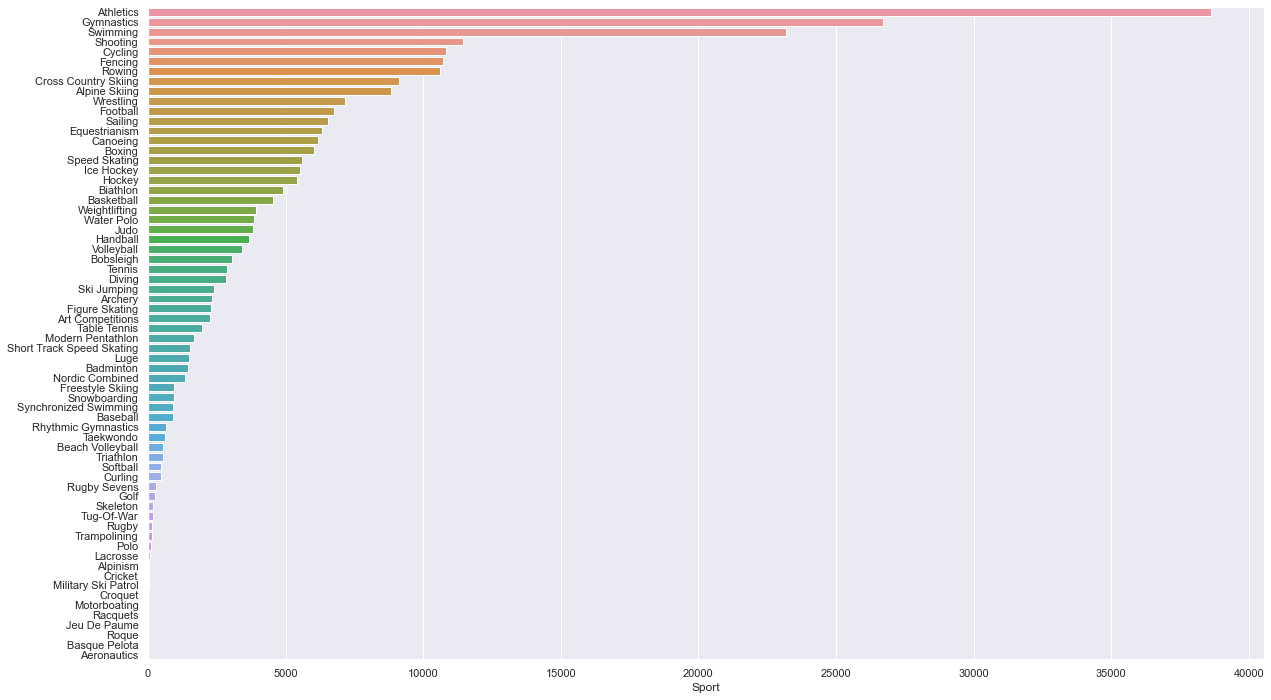

In [80]:
# Sports participated in Olympics
s = df.Sport.value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,12))
plt.xticks(rotation=0)

sns.barplot(s, s.index)
plt.show()

In [81]:
# Medals won by Sports
sp = dff.Sport.value_counts().sort_values(ascending=False)
sp

Athletics        3969
Swimming         3048
Rowing           2945
Gymnastics       2256
Fencing          1742
                 ... 
Motorboating        7
Roque               3
Jeu De Paume        3
Basque Pelota       2
Aeronautics         1
Name: Sport, Length: 66, dtype: int64

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


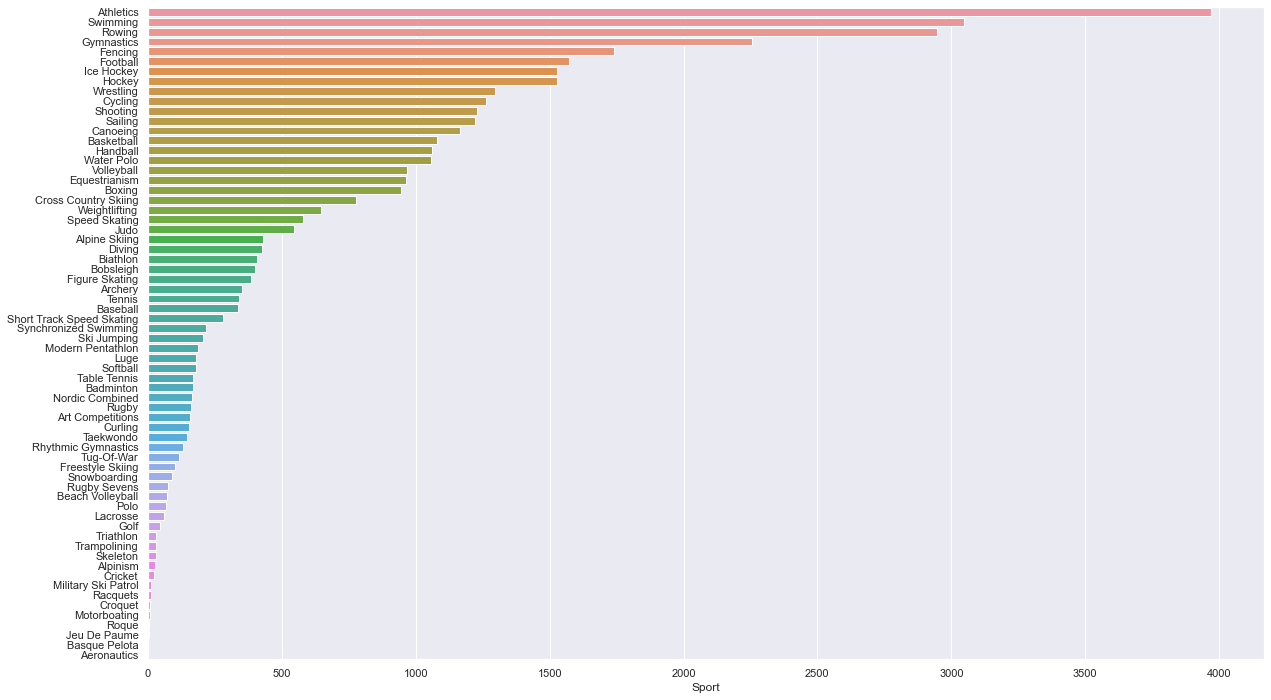

In [82]:
# Find most
plt.figure(figsize=(20,12))
plt.xticks(rotation=0)

sns.barplot(sp, sp.index)
plt.show()

In [83]:
dff.head()

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
0,Edgar Lindenau Aabye,M,34,175,70,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,Arvo Ossian Aaltonen,M,30,175,70,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
2,Arvo Ossian Aaltonen,M,30,175,70,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
3,Juhamatti Tapio Aaltonen,M,28,184,85,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,Paavo Johannes Aaltonen,M,28,175,64,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


In [84]:
sp_medal = dff[['Sport', 'Medal']]
sp_medal.Medal.value_counts()

Gold      13368
Bronze    13292
Silver    13105
Name: Medal, dtype: int64

In [85]:
g_medal = sp_medal[sp_medal.Medal == 'Gold'].Sport.value_counts().sort_values(ascending=False).head(50)
s_medal = sp_medal[sp_medal.Medal == 'Silver'].Sport.value_counts().sort_values(ascending=False).head(50)
# s_medal
b_medal = sp_medal[sp_medal.Medal == 'Bronze'].Sport.value_counts().sort_values(ascending=False).head(50)
b_medal.head()

Athletics     1296
Rowing         990
Swimming       956
Gymnastics     719
Fencing        566
Name: Sport, dtype: int64

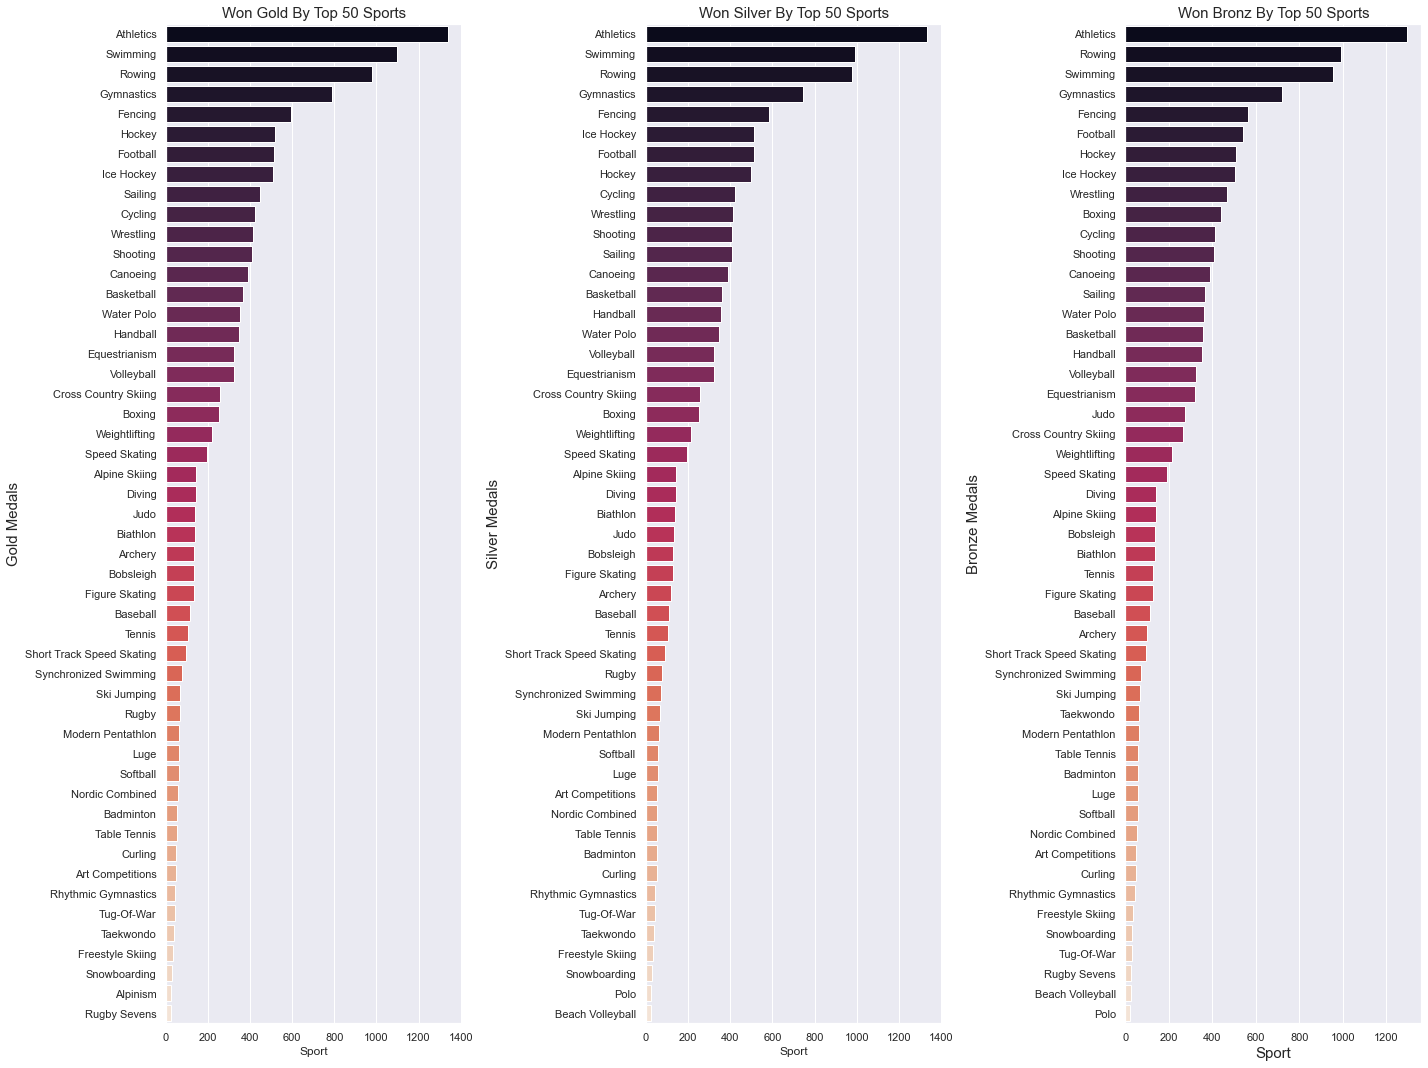

In [86]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)

plt.subplot(1,3,1)
plt.title('Won Gold By Top 50 Sports', fontsize=15)
#plt.xlabel('Sports', fontsize=15)
plt.ylabel('Gold Medals', fontsize=15)
sns.barplot(x=g_medal, y=g_medal.index, palette = 'rocket');
#sns.lineplot(x=g_medal, y=g_medal.index, palette = 'crest');

plt.subplot(1,3,2)
plt.title('Won Silver By Top 50 Sports', fontsize=15)
#plt.xlabel('Sports', fontsize=15)
plt.ylabel('Silver Medals', fontsize=15)
sns.barplot(x=s_medal, y=s_medal.index, palette = 'rocket');
#sns.lineplot(x=s_medal, y=s_medal.index, color='b', palette = 'crest');

plt.subplot(1,3,3)
plt.title('Won Bronz By Top 50 Sports', fontsize=15)
plt.xlabel('Sports', fontsize=15)
plt.ylabel('Bronze Medals', fontsize=15)
sns.barplot(x=b_medal, y=b_medal.index, palette = 'rocket');
#sns.lineplot(x=b_medal, y=b_medal.index, color='b', palette = 'crest');

plt.tight_layout()

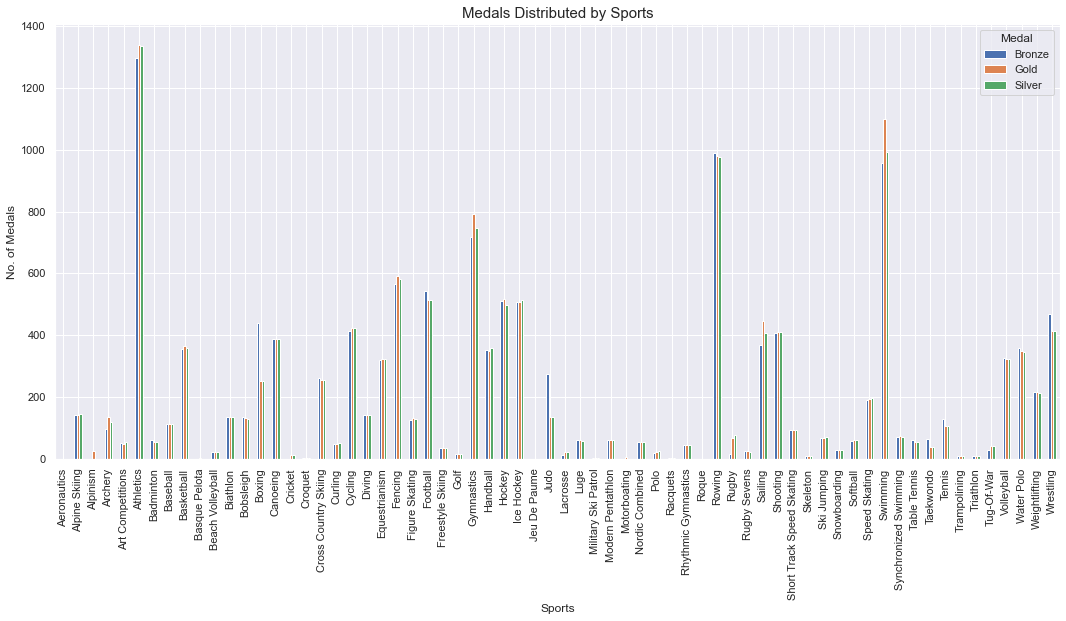

In [87]:
# women = dff[dff.Gender == "F"]
# women
pd.crosstab(df.Sport, df.Medal).plot(kind='bar', figsize=(18,8))
plt.title('Medals Distributed by Sports',fontsize=15)
plt.xlabel('Sports',fontsize=12)
plt.ylabel('No. of Medals',fontsize=12)
plt.show()

## 7 Participants

In [88]:
dff.isnull().sum()
# dff.Name

Name      0
Gender    0
Age       0
Height    0
Weight    0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
Region    0
dtype: int64

In [89]:
participants1 = dfa.Name.value_counts().head(50)

participants2 = dff.Name.value_counts().head(50)
#participants.count()

<AxesSubplot:xlabel='Name'>

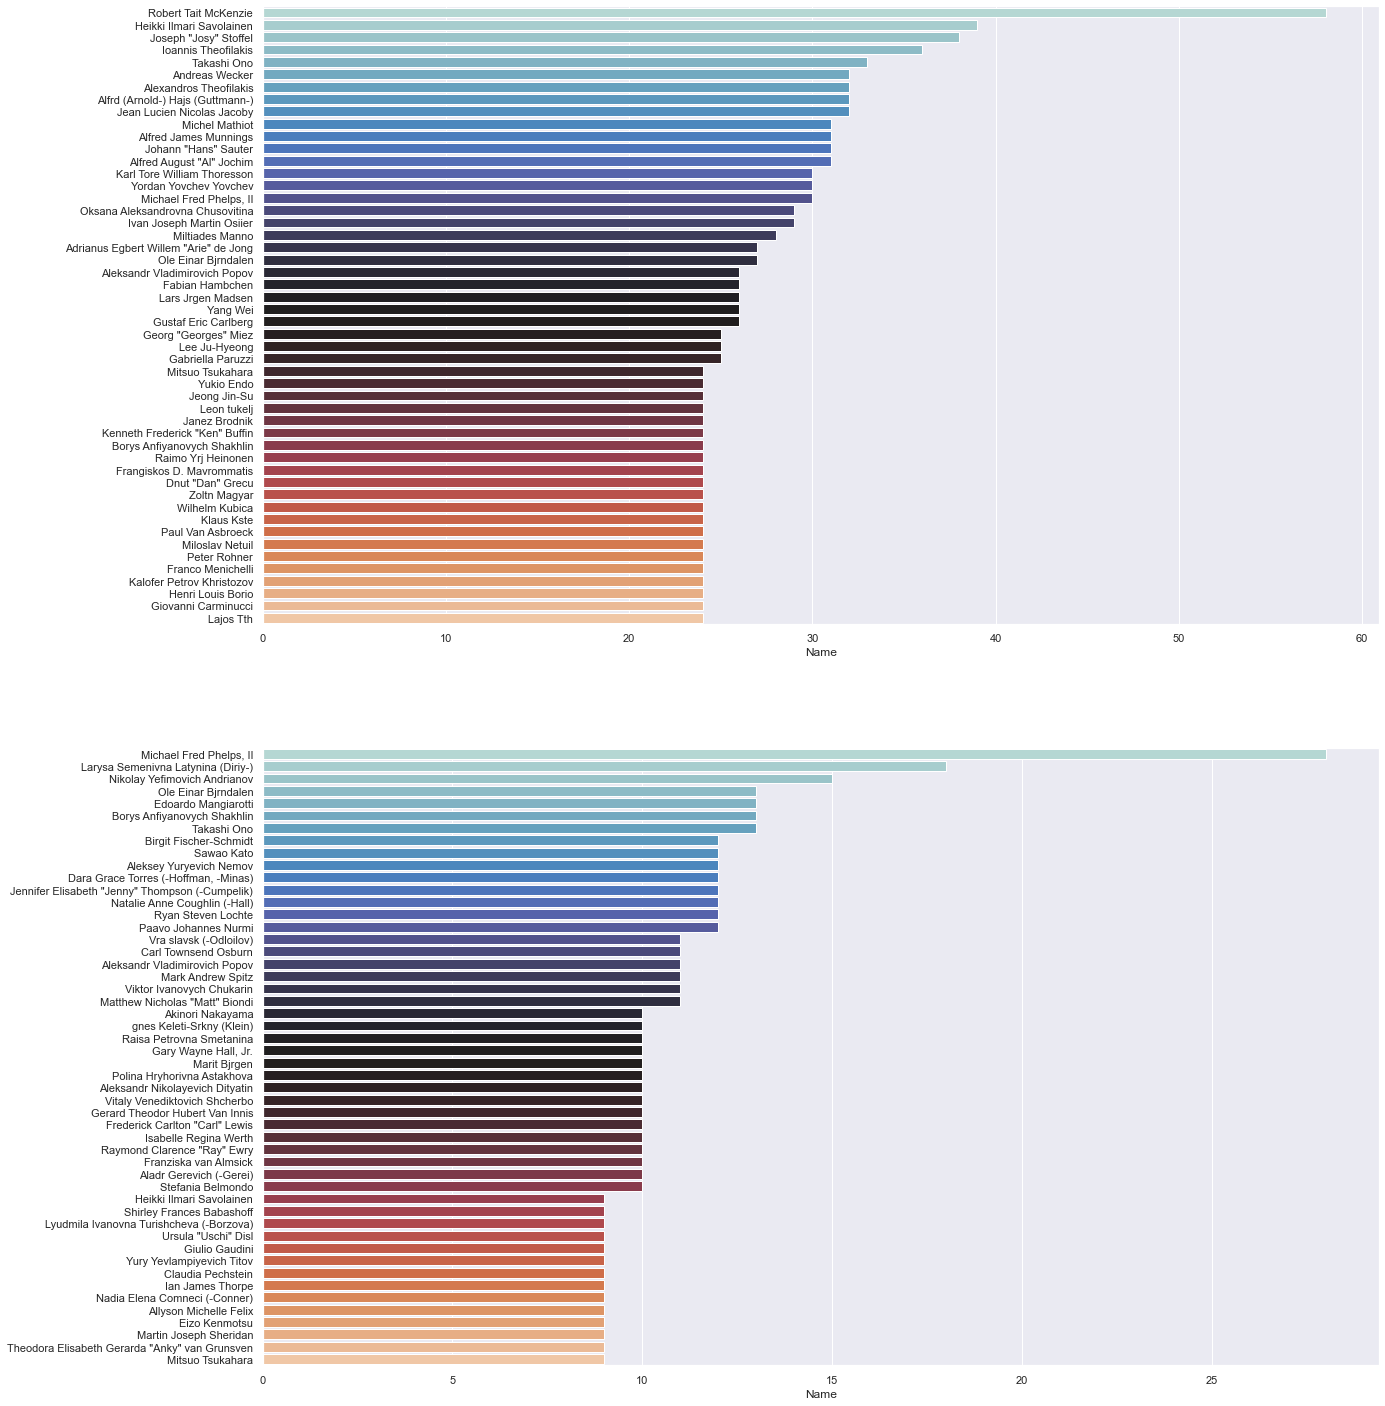

In [90]:
plt.figure(figsize=(20,25))
plt.xticks(rotation=0)

plt.subplot(2,1,1)
sns.barplot(x = participants1, y = participants1.index, palette="icefire")

plt.subplot(2,1,2)
sns.barplot(x = participants2, y = participants2.index, palette="icefire")

## 8 Country Comparison

### India

In [91]:
ind = dff[(dff.Region=='India') & (dff.Medal == 'Gold')]
ind

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
492,Shaukat Ali,M,30,175,70,IND,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
493,Syed Mushtaq Ali,M,22,165,61,IND,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India
529,Richard James Allen,M,25,172,70,IND,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
530,Richard James Allen,M,30,172,70,IND,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
531,Richard James Allen,M,34,172,70,IND,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33981,Dung Dung Sylvanus,M,31,160,62,IND,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India
34365,Carlyle Carrol Tapsell,M,23,182,70,IND,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
34366,Carlyle Carrol Tapsell,M,27,182,70,IND,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India
36502,"Max ""Maxie"" Vaz",M,25,175,70,IND,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India


In [92]:
print('Total Gold Medal Wond By Indan Players : ', ind[ind['Medal']=='Gold'].Medal.count())
print('Total Silver Medal Wond By Indan Players : ', ind[ind['Medal']=='Silver'].Medal.count())
print('Total Bronze Medal Wond By Indan Players : ', ind[ind['Medal']=='Bronze'].Medal.count(), '\n')
print('Total Medal Wond By Indan Players : ', ind.Medal.value_counts().sum())
print('Total Participants For Sports Hockey : ', ind[ind['Sport']=='Hockey'].Sport.value_counts().sum())

Total Gold Medal Wond By Indan Players :  138
Total Silver Medal Wond By Indan Players :  0
Total Bronze Medal Wond By Indan Players :  0 

Total Medal Wond By Indan Players :  138
Total Participants For Sports Hockey :  130


In [93]:
ind[ind['Sport']!='Hockey'].head()

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
2905,Abhinav Bindra,M,25,173,70,IND,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India
31648,Antarge Sherpa,M,25,175,70,IND,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India
31649,Lhakpa Sherpa,M,25,175,70,IND,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India
31650,Narbu Sherpa,M,25,175,70,IND,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India
31651,Pasang Sherpa,M,25,175,70,IND,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India


### United State Of America (USA)

In [94]:
usa = dff[dff.Region=='USA']
usa

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
37,Stephen Anthony Abas,M,26,165,55,USA,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,USA
56,Jeremy Abbott,M,28,175,70,USA,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze,USA
57,Margaret Ives Abbott (-Dunne),F,23,175,70,USA,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA
58,Monica Cecilia Abbott,F,23,191,88,USA,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,USA
59,Nia Nicole Abdallah,F,20,175,56,USA,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,Rbert Zimonyi,M,46,170,52,USA,1964,Summer,Tokyo,Rowing,Rowing Men's Coxed Eights,Gold,USA
39620,"Albert Conrad ""Al"" Zirkel",M,19,175,70,USA,1904,Summer,St. Louis,Wrestling,"Wrestling Men's Lightweight, Freestyle",Bronze,USA
39637,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,16,139,36,USA,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Team All-Around,Bronze,USA
39644,"Jacqueline Jean ""Jackie"" Zoch",F,27,180,76,USA,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Bronze,USA


In [95]:
print('Total Gold Medal Wond By USA Players : ', usa[usa['Medal']=='Gold'].Medal.count())
print('Total Silver Medal Wond By USA Players : ', usa[usa['Medal']=='Silver'].Medal.count())
print('Total Bronze Medal Wond By USA Players : ', usa[usa['Medal']=='Bronze'].Medal.count(), '\n')
print('Total Medal Wond By USA Players : ', usa.Medal.value_counts().sum())

Total Gold Medal Wond By USA Players :  2638
Total Silver Medal Wond By USA Players :  1640
Total Bronze Medal Wond By USA Players :  1358 

Total Medal Wond By USA Players :  5636


### 8 GDP wise distribution

In [96]:
#import GDP
dfg = pd.read_csv('GDP1.csv')
#dfg.Region.sort_values(ascending=True).unique()
dfg

,Region,Year,GDP
0,Afghanistan,1992,3.475000e+09
1,Albania,1992,6.521750e+08
2,Algeria,1992,4.800308e+10
3,Andorra,1992,1.210014e+09
4,Angola,1992,9.395000e+09
...,...,...,...
2543,Venezuela,2016,2.790000e+11
2544,Vietnam,2016,2.050000e+11
2545,Yemen,2016,3.131737e+10
2546,Zambia,2016,2.095841e+10


In [97]:
df.Year.sort_values(ascending=True).unique()

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

In [98]:
df_new = df.loc[df.Year.isin([1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016])]
df_new.isnull().sum()

Name           0
Gender         0
Age            0
Height         0
Weight         0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     105431
Region         0
dtype: int64

In [99]:
df_new = df_new.merge(dfg, on=['Region','Year'], how='left')
df_new.isnull().sum()

Name           0
Gender         0
Age            0
Height         0
Weight         0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     105431
Region         0
GDP         1187
dtype: int64

In [100]:
#df_new[df_new.isnull().any(axis=1)]
df_new[df_new.GDP.isnull()]

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region,GDP
253,Hamza Abdo,M,17,175,70,PLE,2008,Summer,Beijing,Swimming,Swimming Men's 50 metres Freestyle,NaN,Palestine,NaN
376,"Julianne ""Anne"" Abernathy",F,38,165,75,ISV,1992,Winter,Albertville,Luge,Luge Women's Singles,NaN,"Virgin Islands, US",NaN
377,"Julianne ""Anne"" Abernathy",F,40,165,75,ISV,1994,Winter,Lillehammer,Luge,Luge Women's Singles,NaN,"Virgin Islands, US",NaN
378,"Julianne ""Anne"" Abernathy",F,44,165,75,ISV,1998,Winter,Nagano,Luge,Luge Women's Singles,NaN,"Virgin Islands, US",NaN
379,"Julianne ""Anne"" Abernathy",F,48,165,75,ISV,2002,Winter,Salt Lake City,Luge,Luge Women's Singles,NaN,"Virgin Islands, US",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121765,Zachary John Zoller,M,21,178,98,ISV,1994,Winter,Lillehammer,Bobsleigh,Bobsleigh Men's Two,NaN,"Virgin Islands, US",NaN
121766,Zachary John Zoller,M,21,178,98,ISV,1994,Winter,Lillehammer,Bobsleigh,Bobsleigh Men's Four,NaN,"Virgin Islands, US",NaN
121767,Zachary John Zoller,M,25,178,98,ISV,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Two,NaN,"Virgin Islands, US",NaN
121768,Zachary John Zoller,M,29,178,98,ISV,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Two,NaN,"Virgin Islands, US",NaN


In [101]:
#dfg.Region.sort_values(ascending=True).unique()

In [102]:
#df_new.Region.sort_values(ascending=True).unique()

In [103]:
df_new = df_new[df_new['GDP'].notna()]

In [104]:
df_new.isnull().sum()

Name           0
Gender         0
Age            0
Height         0
Weight         0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     104296
Region         0
GDP            0
dtype: int64

In [105]:
df_new.shape

(121023, 14)

In [106]:
df_new.isnull().sum()
dfm = df_new.dropna()
dfm.isnull().sum()

Name      0
Gender    0
Age       0
Height    0
Weight    0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
Region    0
GDP       0
dtype: int64

In [107]:
dfm.reset_index(drop=True,inplace=True)
dfm

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region,GDP
0,Juhamatti Tapio Aaltonen,M,28,184,85,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,2.740000e+11
1,Kjetil Andr Aamodt,M,20,176,85,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,1.310000e+11
2,Kjetil Andr Aamodt,M,20,176,85,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway,1.310000e+11
3,Kjetil Andr Aamodt,M,22,176,85,NOR,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,Norway,1.270000e+11
4,Kjetil Andr Aamodt,M,22,176,85,NOR,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,Norway,1.270000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16722,Claudia Antoinette Zwiers,F,22,181,78,NED,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,Netherlands,4.500000e+11
16723,Henk Jan Zwolle,M,27,197,93,NED,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze,Netherlands,3.630000e+11
16724,Henk Jan Zwolle,M,31,197,93,NED,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,4.500000e+11
16725,Olesya Nikolayevna Zykina,F,19,171,64,RUS,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,2.600000e+11


In [108]:
# dfm.to_csv("dfg.csv")

In [109]:
X = dfm[(dfm["Year"]==2016) & dfm["Region"]].sort_values(by='GDP',ascending=False)
# X

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


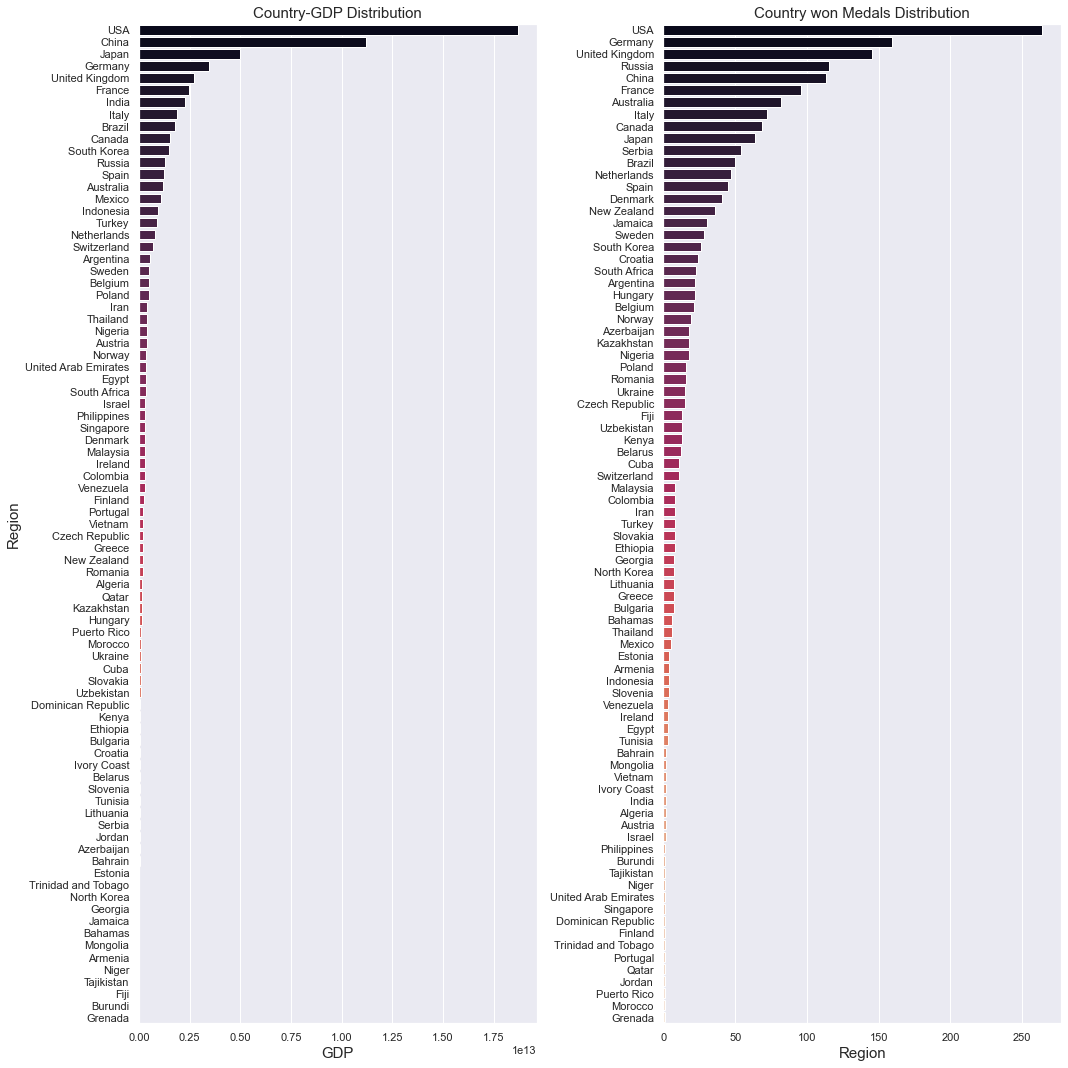

In [110]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=0)


a = X.Region
b = X.GDP
c = X.Region.value_counts()

plt.subplot(1,2,1)
plt.title('Country-GDP Distribution',fontsize=15)
plt.xlabel('Countries', fontsize=15)
plt.ylabel("GDP", fontsize=15)
sns.barplot(X.GDP, X.Region, palette = 'rocket');



plt.subplot(1,2,2)
plt.title('Country won Medals Distribution',fontsize=15)
plt.xlabel('No. of Medals', fontsize=15)
#plt.ylabel("Region", fontsize=15)
sns.barplot(c, c.index, palette = 'rocket');

plt.tight_layout()

In [111]:
X1 = dfm[(dfm["Year"]==2014) & dfm["Region"]].sort_values(by='GDP',ascending=False)
X1.Region.unique()

array(['USA', 'China', 'Japan', 'Germany', 'United Kingdom', 'France',
       'Italy', 'Russia', 'Canada', 'South Korea', 'Australia',
       'Netherlands', 'Switzerland', 'Sweden', 'Poland', 'Norway',
       'Austria', 'Finland', 'Kazakhstan', 'Czech Republic', 'Ukraine',
       'Slovakia', 'Belarus', 'Croatia', 'Slovenia', 'Latvia'],
      dtype=object)

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


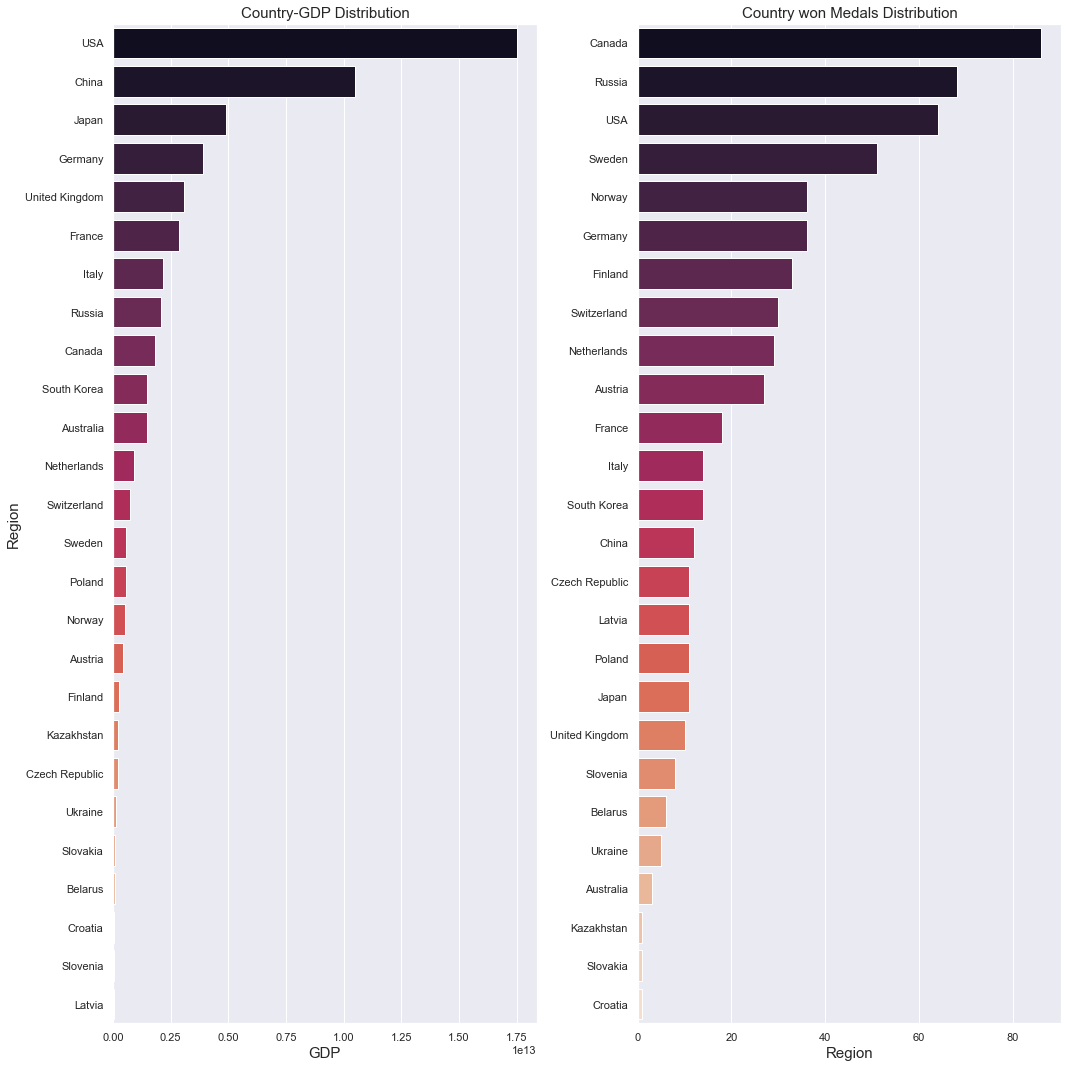

In [112]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=0)


a = X1.Region
b = X1.GDP
c = X1.Region.value_counts()

plt.subplot(1,2,1)
plt.title('Country-GDP Distribution',fontsize=15)
plt.xlabel('Countries', fontsize=15)
plt.ylabel("GDP", fontsize=15)
sns.barplot(X1.GDP, X1.Region, palette = 'rocket');



plt.subplot(1,2,2)
plt.title('Country won Medals Distribution',fontsize=15)
plt.xlabel('No. of Medals', fontsize=15)
#plt.ylabel("Region", fontsize=15)
sns.barplot(c, c.index, palette = 'rocket');

plt.tight_layout()

In [113]:
dfm[(dfm["Year"]==1996) & (dfm["Region"]=="USA")]

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region,GDP
100,Derrick Ralph Adkins,M,26,188,80,USA,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Gold,USA,2.051554e+10
125,Andre Kirk Agassi,M,26,180,80,USA,1996,Summer,Atlanta,Tennis,Tennis Men's Singles,Gold,USA,2.051554e+10
188,Michelle Anne Akers,F,30,178,68,USA,1996,Summer,Atlanta,Football,Football Women's Football,Gold,USA,2.051554e+10
271,John Chad Allen,M,21,185,86,USA,1996,Summer,Atlanta,Baseball,Baseball Men's Baseball,Bronze,USA,2.051554e+10
443,Kurt Steven Angle,M,27,178,100,USA,1996,Summer,Atlanta,Wrestling,"Wrestling Men's Heavyweight, Freestyle",Gold,USA,2.051554e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,Christa Lee Williams,F,18,172,72,USA,1996,Summer,Atlanta,Softball,Softball Women's Softball,Gold,USA,2.051554e+10
15928,Jason Gerald Williams,M,21,172,82,USA,1996,Summer,Atlanta,Baseball,Baseball Men's Baseball,Bronze,USA,2.051554e+10
15976,Linetta A. Wilson,F,28,170,65,USA,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,Gold,USA,2.051554e+10
15984,Staci Nicole Wilson,F,20,158,52,USA,1996,Summer,Atlanta,Football,Football Women's Football,Gold,USA,2.051554e+10


C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


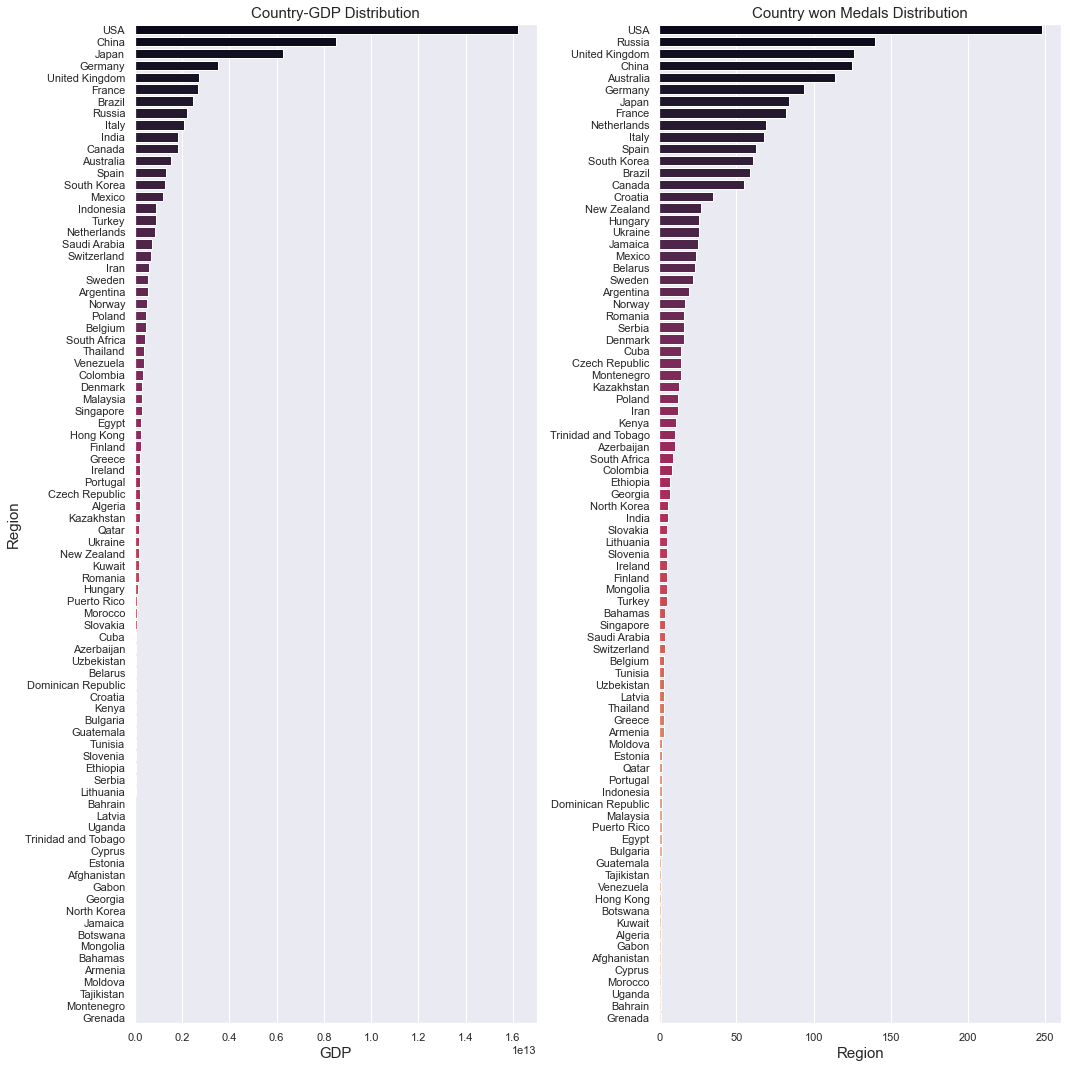

In [114]:
X2 = dfm[(dfm["Year"]==2012) & dfm["Region"]].sort_values(by='GDP',ascending=False)
plt.figure(figsize=(15,15))
plt.xticks(rotation=0)


a = X2.Region
b = X2.GDP
c = X2.Region.value_counts()

plt.subplot(1,2,1)
plt.title('Country-GDP Distribution',fontsize=15)
plt.xlabel('Countries', fontsize=15)
plt.ylabel("GDP", fontsize=15)
sns.barplot(X2.GDP, X2.Region, palette = 'rocket');



plt.subplot(1,2,2)
plt.title('Country won Medals Distribution',fontsize=15)
plt.xlabel('No. of Medals', fontsize=15)
#plt.ylabel("Region", fontsize=15)
sns.barplot(c, c.index, palette = 'rocket');

plt.tight_layout()

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


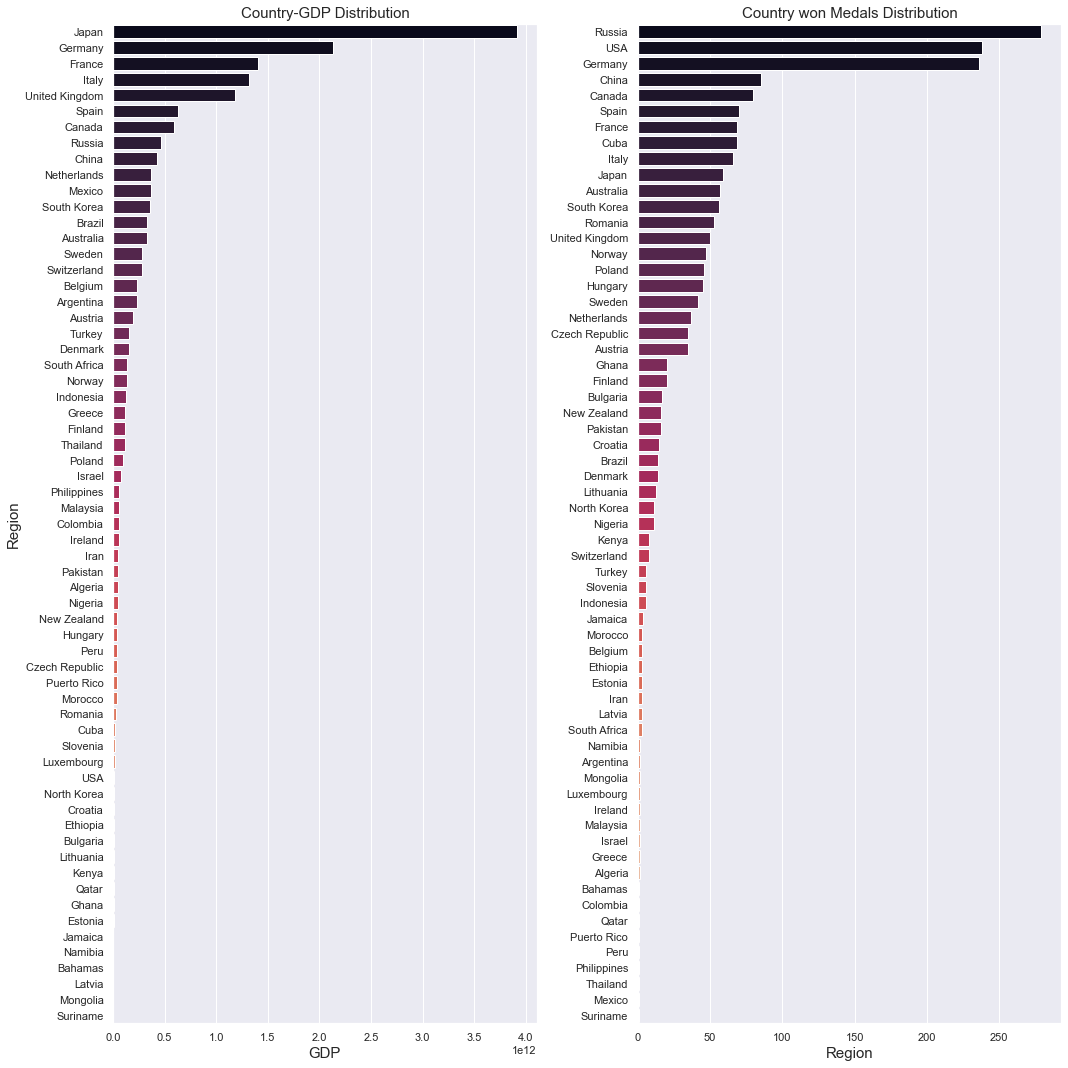

In [115]:
X3 = dfm[(dfm["Year"]==1992) & dfm["Region"]].sort_values(by='GDP',ascending=False)
plt.figure(figsize=(15,15))
plt.xticks(rotation=0)


a = X3.Region
b = X3.GDP
c = X3.Region.value_counts()

plt.subplot(1,2,1)
plt.title('Country-GDP Distribution',fontsize=15)
plt.xlabel('Countries', fontsize=15)
plt.ylabel("GDP", fontsize=15)
sns.barplot(X3.GDP, X3.Region, palette = 'rocket');



plt.subplot(1,2,2)
plt.title('Country won Medals Distribution',fontsize=15)
plt.xlabel('No. of Medals', fontsize=15)
#plt.ylabel("Region", fontsize=15)
sns.barplot(c, c.index, palette = 'rocket');

plt.tight_layout()

## Data Preprocessing

In [116]:
df_new.columns

Index(['Name', 'Gender', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season',
       'City', 'Sport', 'Event', 'Medal', 'Region', 'GDP'],
      dtype='object')

In [117]:
# Select Required columns
dfn = df[['Gender', 'Age', 'Height', 'Weight', 'Season', 'Region','Sport','Event','Medal']]
dfn

,Gender,Age,Height,Weight,Season,Region,Sport,Event,Medal
0,M,24,180,80,Summer,China,Basketball,Basketball Men's Basketball,NaN
1,M,23,170,60,Summer,China,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24,175,70,Summer,Denmark,Football,Football Men's Football,NaN
3,M,34,175,70,Summer,Denmark,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21,185,82,Winter,Netherlands,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...
271111,M,29,179,89,Winter,Poland,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,M,27,176,59,Winter,Poland,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,M,27,176,59,Winter,Poland,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,M,30,185,96,Winter,Poland,Bobsleigh,Bobsleigh Men's Four,NaN


In [118]:
dfn.isnull().sum()

Gender         0
Age            0
Height         0
Weight         0
Season         0
Region         0
Sport          0
Event          0
Medal     229928
dtype: int64

In [119]:
le = LabelEncoder()
dfn['Gender']= le.fit_transform(dfn['Gender'])

dfn['Gender'].unique()

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_2268/3242760647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Gender']= le.fit_transform(dfn['Gender'])


array([1, 0])

In [120]:
print('Male =', 1, '\nFemale =', 0)

Male = 1 
Female = 0


In [121]:
dfn.Season.unique()

array(['Summer', 'Winter'], dtype=object)

In [122]:
dfn['Season']= le.fit_transform(dfn['Season'])

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_2268/994204159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Season']= le.fit_transform(dfn['Season'])


In [123]:
print('\n 0 = Summer \n 1 = Winter')


 0 = Summer 
 1 = Winter


In [124]:
dfn.Medal.fillna('No Medal', inplace=True)
#dfn

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [125]:
dfn.Medal.value_counts()

No Medal    229928
Gold         13368
Bronze       13292
Silver       13105
Name: Medal, dtype: int64

In [126]:
dfn['Medal'].replace({'Gold' : 1, 'Silver' :  1, 'Bronze' : 1, 'No Medal' : 0}, inplace = True)

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [127]:
dfn.Medal.value_counts()

0    229928
1     39765
Name: Medal, dtype: int64

In [128]:
# dfn['Sport']= le.fit_transform(dfn['Sport'])
# dfn['Region'] = le.fit_transform(dfn['Region'])
dfn = pd.get_dummies(dfn, columns = ['Sport', 'Region', 'Event'], drop_first=True)

# dfn['Sport']= le.fit_transform(dfn['Sport'])
# dfn['Region']= le.fit_transform(dfn['Region'])
# dfn['Event']= le.fit_transform(dfn['Event'])

In [129]:
dfn

,Gender,Age,Height,Weight,Season,Medal,Sport_Alpine Skiing,Sport_Alpinism,Sport_Archery,Sport_Art Competitions,...,"Event_Wrestling Men's Super-Heavyweight, Greco-Roman","Event_Wrestling Men's Unlimited Class, Greco-Roman","Event_Wrestling Men's Welterweight, Freestyle","Event_Wrestling Men's Welterweight, Greco-Roman","Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,175,70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,175,70,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29,179,89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27,176,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27,176,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30,185,96,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
#dfn.Region.sort_values(ascending=True).unique()

In [131]:
# dfn.Sport.sort_values(ascending=True).unique()

### Remove Outliers

In [132]:
Q1 = dfn.Height.quantile(0.25)
Q3 = dfn.Height.quantile(0.75)
Q1, Q3

(170.0, 180.0)

In [133]:
IQR = Q3 - Q1
IQR

10.0

In [134]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(155.0, 195.0)

In [135]:
dfn = dfn[(dfn.Height>lower_limit) & (dfn.Height<upper_limit)]
dfn

,Gender,Age,Height,Weight,Season,Medal,Sport_Alpine Skiing,Sport_Alpinism,Sport_Archery,Sport_Art Competitions,...,"Event_Wrestling Men's Super-Heavyweight, Greco-Roman","Event_Wrestling Men's Unlimited Class, Greco-Roman","Event_Wrestling Men's Welterweight, Freestyle","Event_Wrestling Men's Welterweight, Greco-Roman","Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,175,70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,175,70,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29,179,89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27,176,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27,176,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30,185,96,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
dfn.shape

(256576, 1043)

In [137]:
q1 = dfn.Age.quantile(0.25)
q3 = dfn.Age.quantile(0.75)
q1,q3

(22.0, 28.0)

In [138]:
IQR = q3-q1
IQR

6.0

In [139]:
lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR
lower_limit, upper_limit

(13.0, 37.0)

In [140]:
dfn = dfn[(dfn.Age>13) & (dfn.Age<37)]
dfn

,Gender,Age,Height,Weight,Season,Medal,Sport_Alpine Skiing,Sport_Alpinism,Sport_Archery,Sport_Art Competitions,...,"Event_Wrestling Men's Super-Heavyweight, Greco-Roman","Event_Wrestling Men's Unlimited Class, Greco-Roman","Event_Wrestling Men's Welterweight, Freestyle","Event_Wrestling Men's Welterweight, Greco-Roman","Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,175,70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,175,70,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29,179,89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27,176,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27,176,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30,185,96,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
Q1 = dfn.Weight.quantile(0.25)
Q3 = dfn.Weight.quantile(0.75)
Q1, Q3

(64.0, 75.0)

In [142]:
IQR = Q3 - Q1
IQR

11.0

In [143]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(47.5, 91.5)

In [144]:
dfn = dfn[(dfn.Weight>lower_limit) & (dfn.Weight<upper_limit)]
dfn

,Gender,Age,Height,Weight,Season,Medal,Sport_Alpine Skiing,Sport_Alpinism,Sport_Archery,Sport_Art Competitions,...,"Event_Wrestling Men's Super-Heavyweight, Greco-Roman","Event_Wrestling Men's Unlimited Class, Greco-Roman","Event_Wrestling Men's Welterweight, Freestyle","Event_Wrestling Men's Welterweight, Greco-Roman","Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,175,70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,175,70,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271109,1,28,183,72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271110,0,33,171,69,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271111,1,29,179,89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27,176,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
dfn.reset_index(drop=True, inplace=True)
dfn

,Gender,Age,Height,Weight,Season,Medal,Sport_Alpine Skiing,Sport_Alpinism,Sport_Archery,Sport_Art Competitions,...,"Event_Wrestling Men's Super-Heavyweight, Greco-Roman","Event_Wrestling Men's Unlimited Class, Greco-Roman","Event_Wrestling Men's Welterweight, Freestyle","Event_Wrestling Men's Welterweight, Greco-Roman","Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,175,70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,175,70,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231264,1,28,183,72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231265,0,33,171,69,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231266,1,29,179,89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231267,1,27,176,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
#dfn.isnull().sum().sum()
dfn.head(50)

,Gender,Age,Height,Weight,Season,Medal,Sport_Alpine Skiing,Sport_Alpinism,Sport_Archery,Sport_Art Competitions,...,"Event_Wrestling Men's Super-Heavyweight, Greco-Roman","Event_Wrestling Men's Unlimited Class, Greco-Roman","Event_Wrestling Men's Welterweight, Freestyle","Event_Wrestling Men's Welterweight, Greco-Roman","Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,175,70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,175,70,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,21,185,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,25,185,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,25,185,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,27,185,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,27,185,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# dfn.to_csv("Olympics_cd.csv")

In [148]:
dfn.Medal.value_counts()

0    198268
1     33001
Name: Medal, dtype: int64

In [149]:
# Dependent column
y = dfn['Medal']

In [150]:
# independent columns
x = dfn.drop(columns=["Medal"], axis=1)

In [151]:
y.value_counts()

0    198268
1     33001
Name: Medal, dtype: int64

## Data Standardization

In [152]:
sc = StandardScaler()

x = sc.fit_transform(x)


In [153]:
x.shape


(231269, 1042)

[0.00309997 0.00299626]


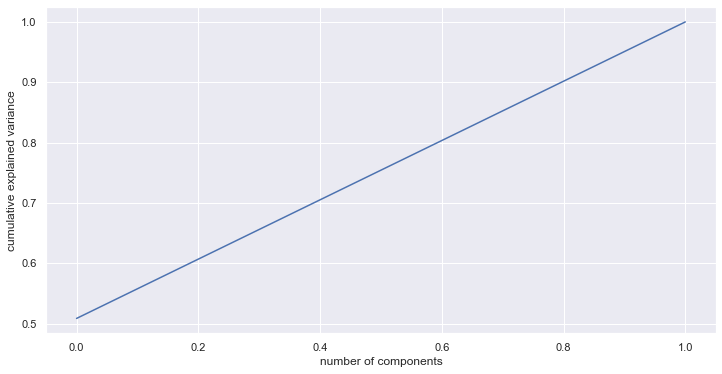

In [154]:
pca = PCA(n_components=2)
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

#Explained variance
pca = PCA().fit(x)
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## SMOTETomek

In [155]:
# from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTETomek

In [156]:
os=SMOTETomek(0.5)
x, y = os.fit_resample(x, y)

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


## Train Test Splitting

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print('Total no. of samples: Training and Testing dataset separately!')
print('x_train:', np.shape(x_train))
print('y_train:', np.shape(y_train))
print('x_test:', np.shape(x_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
x_train: (212273, 2)
y_train: (212273,)
x_test: (53069, 2)
y_test: (53069,)


## Logistic Regression

In [158]:
clf_Lr = LogisticRegression()
clf_Lr.fit(x_train,y_train)

LogisticRegression()

In [159]:
threshold = 0.34
lr_pred = (clf_Lr.predict_proba(x_test)[:, 1] > threshold).astype('float')
print(confusion_matrix(y_test,lr_pred), '\n')
print(accuracy_score(y_test,lr_pred), '\n')
print(classification_report(y_test,lr_pred))

[[25881 10598]
 [10372  6218]] 

0.6048540579245888 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     36479
           1       0.37      0.37      0.37     16590

    accuracy                           0.60     53069
   macro avg       0.54      0.54      0.54     53069
weighted avg       0.61      0.60      0.61     53069



## Random Forest Classifier

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
# rf_pred = rf_model.predict(x_test)

RandomForestClassifier()

In [161]:
threshold = 0.4
rf_pred = (rf_model.predict_proba(x_test)[:, 1] > threshold).astype('float')
print(confusion_matrix(y_test,rf_pred), '\n')
print(accuracy_score(y_test,rf_pred), '\n')
print(classification_report(y_test,rf_pred))

[[30765  5714]
 [ 4177 12413]] 

0.8136200041455464 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     36479
           1       0.68      0.75      0.72     16590

    accuracy                           0.81     53069
   macro avg       0.78      0.80      0.79     53069
weighted avg       0.82      0.81      0.82     53069



## K Nearest Neighbor

In [162]:
knn_model = KNeighborsClassifier().fit(x_train,y_train)
# knn_pred = knn_model.predict(x_test)

In [163]:
threshold = 0.3
knn_pred = (knn_model.predict_proba(x_test)[:, 1] > threshold).astype('float')
print(confusion_matrix(y_test,knn_pred), '\n')
print(accuracy_score(y_test,knn_pred), '\n')
print(classification_report(y_test,knn_pred))

[[25226 11253]
 [ 2738 13852]] 

0.7363620946315175 

              precision    recall  f1-score   support

           0       0.90      0.69      0.78     36479
           1       0.55      0.83      0.66     16590

    accuracy                           0.74     53069
   macro avg       0.73      0.76      0.72     53069
weighted avg       0.79      0.74      0.75     53069



## Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier 
dtc_model = DecisionTreeClassifier().fit(x_train,y_train)
# dtc_pred = dtc_model.predict(x_test)

In [165]:
threshold = 0.35
dtc_pred = (dtc_model.predict_proba(x_test)[:, 1] > threshold).astype('float')
print(confusion_matrix(y_test,dtc_pred), '\n')
print(accuracy_score(y_test,dtc_pred), '\n')
print(classification_report(y_test,dtc_pred))

[[30240  6239]
 [ 5217 11373]] 

0.7841300947822646 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     36479
           1       0.65      0.69      0.67     16590

    accuracy                           0.78     53069
   macro avg       0.75      0.76      0.75     53069
weighted avg       0.79      0.78      0.79     53069



## Gradient Boosting Classifier

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier().fit(x_train,y_train)
# gbc_pred = gbc_model.predict(x_test)

In [167]:
threshold = 0.34
gbc_pred = (gbc_model.predict_proba(x_test)[:, 1] > threshold).astype('float')
print(confusion_matrix(y_test,gbc_pred), '\n')
print(accuracy_score(y_test,gbc_pred), '\n')
print(classification_report(y_test,gbc_pred))

[[23552 12927]
 [ 7711  8879]] 

0.6111100642559687 

              precision    recall  f1-score   support

           0       0.75      0.65      0.70     36479
           1       0.41      0.54      0.46     16590

    accuracy                           0.61     53069
   macro avg       0.58      0.59      0.58     53069
weighted avg       0.65      0.61      0.62     53069



## XGBoost Classifier

In [168]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(x_train,y_train)


C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:47:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [169]:
xgb_pred = xgb_model.predict(x_test)
print(confusion_matrix(y_test,xgb_pred), '\n')
print(accuracy_score(y_test,xgb_pred), '\n')
print(classification_report(y_test,xgb_pred))

[[35588   891]
 [14507  2083]] 

0.7098494412934104 

              precision    recall  f1-score   support

           0       0.71      0.98      0.82     36479
           1       0.70      0.13      0.21     16590

    accuracy                           0.71     53069
   macro avg       0.71      0.55      0.52     53069
weighted avg       0.71      0.71      0.63     53069



In [170]:
threshold = 0.34
xgb_pred = (xgb_model.predict_proba(x_test)[:, 1] > threshold).astype('float')
print(confusion_matrix(y_test,xgb_pred), '\n')
print(accuracy_score(y_test,xgb_pred), '\n')
print(classification_report(y_test,xgb_pred))

[[23429 13050]
 [ 6168 10422]] 

0.6378676816974128 

              precision    recall  f1-score   support

           0       0.79      0.64      0.71     36479
           1       0.44      0.63      0.52     16590

    accuracy                           0.64     53069
   macro avg       0.62      0.64      0.61     53069
weighted avg       0.68      0.64      0.65     53069



In [172]:
print("Logistic Regression\n")
print(confusion_matrix(y_test,lr_pred),'\n')
print(accuracy_score(y_test,lr_pred), '\n')
print(classification_report(y_test,lr_pred))
print("---------------------------------------------------------------")

print("Random Forest Classifier\n")
print(confusion_matrix(y_test,rf_pred),'\n')
print(accuracy_score(y_test,rf_pred), '\n')
print(classification_report(y_test,rf_pred))
print("---------------------------------------------------------------")

print("KNearest Neighbor\n")
print(confusion_matrix(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred), '\n')
print(classification_report(y_test,knn_pred))

print("---------------------------------------------------------------")
print("Decision Tree Classifier\n")
print(confusion_matrix(y_test,dtc_pred))
print(accuracy_score(y_test,dtc_pred), '\n')
print(classification_report(y_test,dtc_pred))
print("---------------------------------------------------------------")
print("Gradient Boosting Classifier\n")
print(confusion_matrix(y_test,gbc_pred))
print(accuracy_score(y_test,gbc_pred), '\n')
print(classification_report(y_test,gbc_pred))
print("---------------------------------------------------------------")
print("XGBoost\n")
print(confusion_matrix(y_test,xgb_pred))
print(accuracy_score(y_test,xgb_pred), '\n')
print(classification_report(y_test,xgb_pred))
print("---------------------------------------------------------------")


Logistic Regression

[[25881 10598]
 [10372  6218]] 

0.6048540579245888 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     36479
           1       0.37      0.37      0.37     16590

    accuracy                           0.60     53069
   macro avg       0.54      0.54      0.54     53069
weighted avg       0.61      0.60      0.61     53069

---------------------------------------------------------------
Random Forest Classifier

[[30765  5714]
 [ 4177 12413]] 

0.8136200041455464 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     36479
           1       0.68      0.75      0.72     16590

    accuracy                           0.81     53069
   macro avg       0.78      0.80      0.79     53069
weighted avg       0.82      0.81      0.82     53069

---------------------------------------------------------------
KNearest Neighbor

[[25226 11253]
 [ 2738 13852]]
0.73636209463

## Cont...